<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh


mat_content = sio.loadmat('face.mat')
1
# mat_content # Let's see the content... 
np.random.seed(1)

In [0]:
face_data = mat_content['X']
face_labels = mat_content['l']

#transpose to select test and training data
face_data = face_data
face_labels = face_labels

1 [0, 1, 2, 3, 4, 5, 6, 7] 8
2 [8, 9, 10, 11, 12, 13, 14, 15] 8
3 [16, 17, 18, 19, 20, 21, 22, 23] 8
4 [24, 25, 26, 27, 28, 29, 30, 31] 8
5 [32, 33, 34, 35, 36, 37, 38, 39] 8
6 [40, 41, 42, 43, 44, 45, 46, 47] 8
7 [48, 49, 50, 51, 52, 53, 54, 55] 8
8 [56, 57, 58, 59, 60, 61, 62, 63] 8
9 [64, 65, 66, 67, 68, 69, 70, 71] 8
10 [72, 73, 74, 75, 76, 77, 78, 79] 8
11 [80, 81, 82, 83, 84, 85, 86, 87] 8
12 [88, 89, 90, 91, 92, 93, 94, 95] 8
13 [96, 97, 98, 99, 100, 101, 102, 103] 8
14 [104, 105, 106, 107, 108, 109, 110, 111] 8
15 [112, 113, 114, 115, 116, 117, 118, 119] 8
16 [120, 121, 122, 123, 124, 125, 126, 127] 8
17 [128, 129, 130, 131, 132, 133, 134, 135] 8
18 [136, 137, 138, 139, 140, 141, 142, 143] 8
19 [144, 145, 146, 147, 148, 149, 150, 151] 8
20 [152, 153, 154, 155, 156, 157, 158, 159] 8
21 [160, 161, 162, 163, 164, 165, 166, 167] 8
22 [168, 169, 170, 171, 172, 173, 174, 175] 8
23 [176, 177, 178, 179, 180, 181, 182, 183] 8
24 [184, 185, 186, 187, 188, 189, 190, 191] 8
25 [192, 193, 1

<Figure size 1440x720 with 0 Axes>

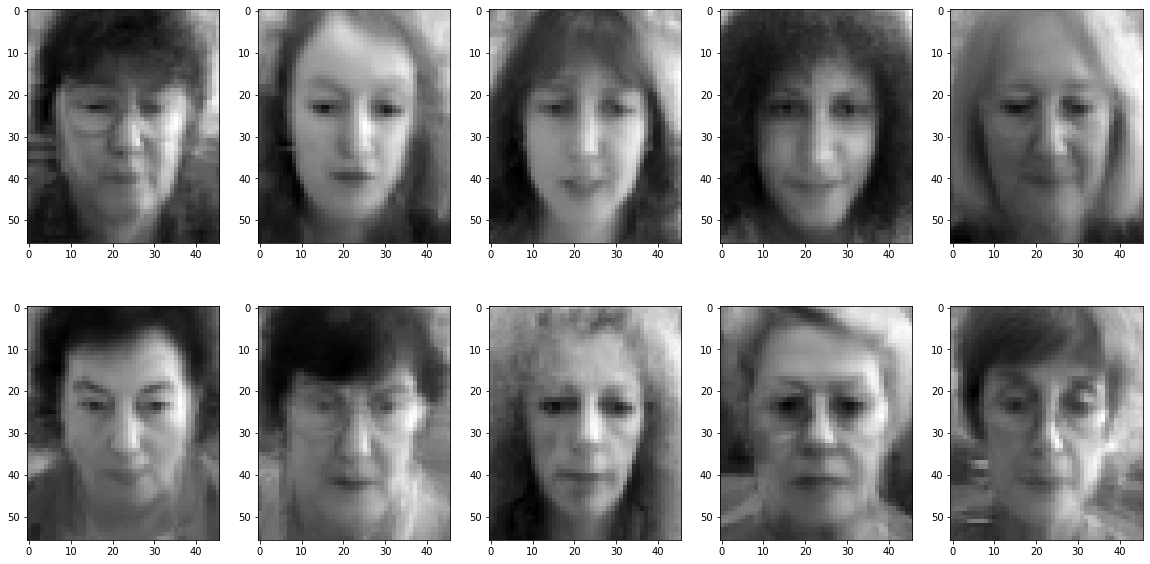

In [27]:
#20/80 test/training split
# data_train, data_test, label_train, label_test = train_test_split(
#     face_data.T, face_labels.T, test_size=0.2, random_state =1 )
# face_data = face_data.T
# face_labels = face_labels.T

data_train = np.reshape(face_data[:,:8],(2576,8))
data_test= np.reshape(face_data[:,8:10],(2576,2))
label_train = np.reshape(face_labels[:,:8],(1,8))
label_test = np.reshape(face_labels[:,8:10],(1,2))


for i in range(10,520,10):
    data_train = np.concatenate((data_train, face_data[:,i:i+8]),axis=1)
    data_test = np.concatenate((data_test, face_data[:,i+8:i+10]),axis=1)
    label_train = np.concatenate((label_train, face_labels[:,i:i+8]),axis=1)
    label_test = np.concatenate((label_test, face_labels[:,i+8:i+10]), axis=1)
    
    
class_indexes = {k : [] for k in range(1, 53)}
for i in range(label_train.shape[1]):
    class_indexes[label_train.T[i].item()].append(i)
    
for i in range(1, len(class_indexes) + 1):
    print(i, class_indexes[i], len(class_indexes[i]))

fig = plt.figure(figsize = (20, 10))

class_means = []

for i in range(1, len(class_indexes)+1):
    temp = np.zeros(2576)
    for k in class_indexes[i]:
        temp += data_train.T[k]
    class_means.append(temp/len(class_indexes[i]))
class_means = np.asarray(class_means)
fig = plt.figure(figsize = (20, 10))

for i in range(10):
    img = np.reshape(class_means[i], (46, 56))
    fig.add_subplot(2, 5, i+1)
    plt.imshow(img.T, cmap = 'gist_gray' )
plt.show()

In [0]:
mean_face = np.mean(data_train, axis = 1)

print('Mean Face Shape {}'.format( mean_face.shape))
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')



In [47]:
print(data_train.shape)
print(label_train.shape)
train_subspaces = []
for i in range(52):
    images = []
    for j in range(int(data_train.shape[1])):
        if label_train.T[j][0] == i+1:
          images.append(data_train.T[j])
    images=np.asarray(images)
    train_subspaces.append(images)
print('    shape:', np.asarray(train_subspaces).shape)

(2576, 416)
(1, 416)
    shape: (52, 8, 2576)


In [0]:
def SWSB(bag_subspaces, X_bar_bag):
    elements = np.asarray(bag_subspaces[0])
    elements_mean = np.mean(elements, axis=0)
    elements = np.subtract(elements,elements_mean)
    S_W = np.matmul(elements.T,elements)
    mean_diff = np.atleast_2d(elements_mean)-X_bar_bag
#     print(mean_diff.shape)
    S_B = np.matmul(mean_diff.T, mean_diff)
    for i in range(1,52):
#         print(i)
        elements = np.asarray(bag_subspaces[i])
#         print(train_subspaces.shape)
        elements_mean = np.mean(elements, axis=0)
        elements = np.subtract(elements,elements_mean)
        S_W += np.matmul(elements.T,elements)
        mean_diff = np.atleast_2d(elements_mean)-X_bar_bag
        S_B += np.matmul(mean_diff.T, mean_diff)
    
    return S_W, S_B

In [70]:
S_W, S_B = SWSB(train_subspaces, mean_face)
rank_SB = np.linalg.matrix_rank(S_B)
rank_SW = np.linalg.matrix_rank(S_W)
print('S_B: {}'.format(S_B.shape))
print('Rank of S_B:', rank_SB)
print('S_W: {}'.format(S_W.shape))
print('Rank of S_W:', rank_SW)

S_B: (2576, 2576)
Rank of S_B: 51
S_W: (2576, 2576)
Rank of S_W: 364


In [82]:
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

def createA(data):
  avg = np.mean(data, axis = 0)
  A = np.empty([0,2576])
  for i in range(len(data)):
    app = np.array([data[i] - avg])
    newA = np.append(A, app, axis = 0)
    A = newA
  A = A.T

  return  A, avg

def createEig(A, S):
  eigvals, eigvecs = np.linalg.eig(S)
  eigvecs = preprocessing.normalize(np.real(np.dot(A, eigvecs).T))
  idx = eigvals.argsort()[::-1]   
  eigvals = eigvals[idx]
  eigvecs  = eigvecs[idx, :]
  return eigvals, eigvecs

def PCA(data_train):
  A, avg = createA(data_train)
  #Low-dimensional computation of eigenspace of dataset 1
  S2 = np.dot(A.T, A)*1/len(data_train)
  Meigvals_new, Meigvecs_new = createEig(A, S2)
  return Meigvals_new, Meigvecs_new, A, avg

Meigvals_new, Meigvecs_new, A, avg = PCA(data_train.T)

M_pca = 19
M_lda = 30

M_pca_range = rank_SW
M_lda_range = rank_SB
acc_array = np.empty((M_pca_range, M_lda_range))
M_pca_array = np.arange(1, M_pca_range+1)
M_lda_array = np.arange(1, M_lda_range+1)
M_pca_best = None
M_lda_best = None
acc_max = 0
for M_pca in range(1, M_pca_range):
  for M_lda in range (1, M_lda_range):

    eigvecsM = Meigvecs_new[:M_pca]
    Wpca = np.dot(A.T, eigvecsM.T).T

    X = Wpca.T
    Y = label_train.reshape(label_train.shape[1])
    lda = LinearDiscriminantAnalysis(n_components = M_lda)
    Wlda = lda.fit_transform(X, Y)
    
    nn = KNeighborsClassifier(n_neighbors=1)
    nn.fit(Wlda, label_train.T.ravel())

    W_test = np.dot(eigvecsM, data_test ).T
    W_test_2 = lda.transform(W_test)
    Accuracy = nn.score(W_test_2, label_test.T.ravel())

    
    print("Mpca",M_pca,"Mlda",M_lda,"Accuracy", Accuracy)
    acc_array[M_pca-1, M_lda-1] = Accuracy

    if (Accuracy > acc_max):
              M_pca_best = M_pca
              M_lda_best = M_lda
              acc_max = Accuracy

print("Accuracy is highest for M_pca:", M_pca_best, "M_lda", M_lda_best)


Mpca 1 Mlda 1 Accuracy 0.019230769230769232
Mpca 1 Mlda 2 Accuracy 0.019230769230769232
Mpca 1 Mlda 3 Accuracy 0.019230769230769232
Mpca 1 Mlda 4 Accuracy 0.019230769230769232
Mpca 1 Mlda 5 Accuracy 0.019230769230769232
Mpca 1 Mlda 6 Accuracy 0.019230769230769232
Mpca 1 Mlda 7 Accuracy 0.019230769230769232
Mpca 1 Mlda 8 Accuracy 0.019230769230769232
Mpca 1 Mlda 9 Accuracy 0.019230769230769232
Mpca 1 Mlda 10 Accuracy 0.019230769230769232
Mpca 1 Mlda 11 Accuracy 0.019230769230769232
Mpca 1 Mlda 12 Accuracy 0.019230769230769232
Mpca 1 Mlda 13 Accuracy 0.019230769230769232
Mpca 1 Mlda 14 Accuracy 0.019230769230769232
Mpca 1 Mlda 15 Accuracy 0.019230769230769232
Mpca 1 Mlda 16 Accuracy 0.019230769230769232
Mpca 1 Mlda 17 Accuracy 0.019230769230769232
Mpca 1 Mlda 18 Accuracy 0.019230769230769232
Mpca 1 Mlda 19 Accuracy 0.019230769230769232


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 52 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 52 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 1 Mlda 20 Accuracy 0.019230769230769232
Mpca 1 Mlda 21 Accuracy 0.019230769230769232
Mpca 1 Mlda 22 Accuracy 0.019230769230769232
Mpca 1 Mlda 23 Accuracy 0.019230769230769232
Mpca 1 Mlda 24 Accuracy 0.019230769230769232
Mpca 1 Mlda 25 Accuracy 0.019230769230769232
Mpca 1 Mlda 26 Accuracy 0.019230769230769232
Mpca 1 Mlda 27 Accuracy 0.019230769230769232
Mpca 1 Mlda 28 Accuracy 0.019230769230769232
Mpca 1 Mlda 29 Accuracy 0.019230769230769232
Mpca 1 Mlda 30 Accuracy 0.019230769230769232
Mpca 1 Mlda 31 Accuracy 0.019230769230769232
Mpca 1 Mlda 32 Accuracy 0.019230769230769232
Mpca 1 Mlda 33 Accuracy 0.019230769230769232
Mpca 1 Mlda 34 Accuracy 0.019230769230769232
Mpca 1 Mlda 35 Accuracy 0.019230769230769232
Mpca 1 Mlda 36 Accuracy 0.019230769230769232
Mpca 1 Mlda 37 Accuracy 0.019230769230769232
Mpca 1 Mlda 38 Accuracy 0.019230769230769232


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 52 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 52 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 1 Mlda 39 Accuracy 0.019230769230769232
Mpca 1 Mlda 40 Accuracy 0.019230769230769232
Mpca 1 Mlda 41 Accuracy 0.019230769230769232
Mpca 1 Mlda 42 Accuracy 0.019230769230769232
Mpca 1 Mlda 43 Accuracy 0.019230769230769232
Mpca 1 Mlda 44 Accuracy 0.019230769230769232
Mpca 1 Mlda 45 Accuracy 0.019230769230769232
Mpca 1 Mlda 46 Accuracy 0.019230769230769232
Mpca 1 Mlda 47 Accuracy 0.019230769230769232
Mpca 1 Mlda 48 Accuracy 0.019230769230769232
Mpca 1 Mlda 49 Accuracy 0.019230769230769232
Mpca 1 Mlda 50 Accuracy 0.019230769230769232
Mpca 2 Mlda 1 Accuracy 0.019230769230769232
Mpca 2 Mlda 2 Accuracy 0.019230769230769232
Mpca 2 Mlda 3 Accuracy 0.019230769230769232
Mpca 2 Mlda 4 Accuracy 0.019230769230769232
Mpca 2 Mlda 5 Accuracy 0.019230769230769232
Mpca 2 Mlda 6 Accuracy 0.019230769230769232


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 52 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 52 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 2 Mlda 7 Accuracy 0.019230769230769232
Mpca 2 Mlda 8 Accuracy 0.019230769230769232
Mpca 2 Mlda 9 Accuracy 0.019230769230769232
Mpca 2 Mlda 10 Accuracy 0.019230769230769232
Mpca 2 Mlda 11 Accuracy 0.019230769230769232
Mpca 2 Mlda 12 Accuracy 0.019230769230769232
Mpca 2 Mlda 13 Accuracy 0.019230769230769232
Mpca 2 Mlda 14 Accuracy 0.019230769230769232
Mpca 2 Mlda 15 Accuracy 0.019230769230769232
Mpca 2 Mlda 16 Accuracy 0.019230769230769232
Mpca 2 Mlda 17 Accuracy 0.019230769230769232
Mpca 2 Mlda 18 Accuracy 0.019230769230769232
Mpca 2 Mlda 19 Accuracy 0.019230769230769232
Mpca 2 Mlda 20 Accuracy 0.019230769230769232
Mpca 2 Mlda 21 Accuracy 0.019230769230769232
Mpca 2 Mlda 22 Accuracy 0.019230769230769232


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 52 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 52 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 2 Mlda 23 Accuracy 0.019230769230769232
Mpca 2 Mlda 24 Accuracy 0.019230769230769232
Mpca 2 Mlda 25 Accuracy 0.019230769230769232
Mpca 2 Mlda 26 Accuracy 0.019230769230769232
Mpca 2 Mlda 27 Accuracy 0.019230769230769232
Mpca 2 Mlda 28 Accuracy 0.019230769230769232
Mpca 2 Mlda 29 Accuracy 0.019230769230769232
Mpca 2 Mlda 30 Accuracy 0.019230769230769232
Mpca 2 Mlda 31 Accuracy 0.019230769230769232
Mpca 2 Mlda 32 Accuracy 0.019230769230769232
Mpca 2 Mlda 33 Accuracy 0.019230769230769232
Mpca 2 Mlda 34 Accuracy 0.019230769230769232
Mpca 2 Mlda 35 Accuracy 0.019230769230769232
Mpca 2 Mlda 36 Accuracy 0.019230769230769232
Mpca 2 Mlda 37 Accuracy 0.019230769230769232
Mpca 2 Mlda 38 Accuracy 0.019230769230769232


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 52 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 52 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 2 Mlda 39 Accuracy 0.019230769230769232
Mpca 2 Mlda 40 Accuracy 0.019230769230769232
Mpca 2 Mlda 41 Accuracy 0.019230769230769232
Mpca 2 Mlda 42 Accuracy 0.019230769230769232
Mpca 2 Mlda 43 Accuracy 0.019230769230769232
Mpca 2 Mlda 44 Accuracy 0.019230769230769232
Mpca 2 Mlda 45 Accuracy 0.019230769230769232
Mpca 2 Mlda 46 Accuracy 0.019230769230769232
Mpca 2 Mlda 47 Accuracy 0.019230769230769232
Mpca 2 Mlda 48 Accuracy 0.019230769230769232
Mpca 2 Mlda 49 Accuracy 0.019230769230769232
Mpca 2 Mlda 50 Accuracy 0.019230769230769232
Mpca 3 Mlda 1 Accuracy 0.019230769230769232
Mpca 3 Mlda 2 Accuracy 0.009615384615384616
Mpca 3 Mlda 3 Accuracy 0.009615384615384616
Mpca 3 Mlda 4 Accuracy 0.009615384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 52 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 52 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 3 Mlda 5 Accuracy 0.009615384615384616
Mpca 3 Mlda 6 Accuracy 0.009615384615384616
Mpca 3 Mlda 7 Accuracy 0.009615384615384616
Mpca 3 Mlda 8 Accuracy 0.009615384615384616
Mpca 3 Mlda 9 Accuracy 0.009615384615384616
Mpca 3 Mlda 10 Accuracy 0.009615384615384616
Mpca 3 Mlda 11 Accuracy 0.009615384615384616
Mpca 3 Mlda 12 Accuracy 0.009615384615384616
Mpca 3 Mlda 13 Accuracy 0.009615384615384616
Mpca 3 Mlda 14 Accuracy 0.009615384615384616
Mpca 3 Mlda 15 Accuracy 0.009615384615384616
Mpca 3 Mlda 16 Accuracy 0.009615384615384616
Mpca 3 Mlda 17 Accuracy 0.009615384615384616
Mpca 3 Mlda 18 Accuracy 0.009615384615384616
Mpca 3 Mlda 19 Accuracy 0.009615384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 52 - 1) = 3 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 52 - 1) = 3 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 3 Mlda 20 Accuracy 0.009615384615384616
Mpca 3 Mlda 21 Accuracy 0.009615384615384616
Mpca 3 Mlda 22 Accuracy 0.009615384615384616
Mpca 3 Mlda 23 Accuracy 0.009615384615384616
Mpca 3 Mlda 24 Accuracy 0.009615384615384616
Mpca 3 Mlda 25 Accuracy 0.009615384615384616
Mpca 3 Mlda 26 Accuracy 0.009615384615384616
Mpca 3 Mlda 27 Accuracy 0.009615384615384616
Mpca 3 Mlda 28 Accuracy 0.009615384615384616
Mpca 3 Mlda 29 Accuracy 0.009615384615384616
Mpca 3 Mlda 30 Accuracy 0.009615384615384616
Mpca 3 Mlda 31 Accuracy 0.009615384615384616
Mpca 3 Mlda 32 Accuracy 0.009615384615384616
Mpca 3 Mlda 33 Accuracy 0.009615384615384616
Mpca 3 Mlda 34 Accuracy 0.009615384615384616
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 52 - 1) = 3 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 52 - 1) = 3 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

 3 Mlda 35 Accuracy 0.009615384615384616
Mpca 3 Mlda 36 Accuracy 0.009615384615384616
Mpca 3 Mlda 37 Accuracy 0.009615384615384616
Mpca 3 Mlda 38 Accuracy 0.009615384615384616
Mpca 3 Mlda 39 Accuracy 0.009615384615384616
Mpca 3 Mlda 40 Accuracy 0.009615384615384616
Mpca 3 Mlda 41 Accuracy 0.009615384615384616
Mpca 3 Mlda 42 Accuracy 0.009615384615384616
Mpca 3 Mlda 43 Accuracy 0.009615384615384616
Mpca 3 Mlda 44 Accuracy 0.009615384615384616
Mpca 3 Mlda 45 Accuracy 0.009615384615384616
Mpca 3 Mlda 46 Accuracy 0.009615384615384616
Mpca 3 Mlda 47 Accuracy 0.009615384615384616
Mpca 3 Mlda 48 Accuracy 0.009615384615384616
Mpca 3 Mlda 49 Accuracy 0.009615384615384616
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 52 - 1) = 3 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 52 - 1) = 3 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

 3 Mlda 50 Accuracy 0.009615384615384616
Mpca 4 Mlda 1 Accuracy 0.019230769230769232
Mpca 4 Mlda 2 Accuracy 0.04807692307692308
Mpca 4 Mlda 3 Accuracy 0.028846153846153848
Mpca 4 Mlda 4 Accuracy 0.028846153846153848
Mpca 4 Mlda 5 Accuracy 0.028846153846153848
Mpca 4 Mlda 6 Accuracy 0.028846153846153848
Mpca 4 Mlda 7 Accuracy 0.028846153846153848
Mpca 4 Mlda 8 Accuracy 0.028846153846153848
Mpca 4 Mlda 9 Accuracy 0.028846153846153848
Mpca 4 Mlda 10 Accuracy 0.028846153846153848
Mpca 4 Mlda 11 Accuracy 0.028846153846153848
Mpca 4 Mlda 12 Accuracy 0.028846153846153848
Mpca 4 Mlda 13 Accuracy 0.028846153846153848
Mpca 4 Mlda 14 Accuracy 0.028846153846153848


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 52 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 52 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 4 Mlda 15 Accuracy 0.028846153846153848
Mpca 4 Mlda 16 Accuracy 0.028846153846153848
Mpca 4 Mlda 17 Accuracy 0.028846153846153848
Mpca 4 Mlda 18 Accuracy 0.028846153846153848
Mpca 4 Mlda 19 Accuracy 0.028846153846153848
Mpca 4 Mlda 20 Accuracy 0.028846153846153848
Mpca 4 Mlda 21 Accuracy 0.028846153846153848
Mpca 4 Mlda 22 Accuracy 0.028846153846153848
Mpca 4 Mlda 23 Accuracy 0.028846153846153848
Mpca 4 Mlda 24 Accuracy 0.028846153846153848
Mpca 4 Mlda 25 Accuracy 0.028846153846153848
Mpca 4 Mlda 26 Accuracy 0.028846153846153848
Mpca 4 Mlda 27 Accuracy 0.028846153846153848
Mpca 4 Mlda 28 Accuracy 0.028846153846153848
Mpca 4 Mlda 29 Accuracy 0.028846153846153848


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 52 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discrim

Mpca 4 Mlda 30 Accuracy 0.028846153846153848
Mpca 4 Mlda 31 Accuracy 0.028846153846153848
Mpca 4 Mlda 32 Accuracy 0.028846153846153848
Mpca 4 Mlda 33 Accuracy 0.028846153846153848
Mpca 4 Mlda 34 Accuracy 0.028846153846153848
Mpca 4 Mlda 35 Accuracy 0.028846153846153848
Mpca 4 Mlda 36 Accuracy 0.028846153846153848
Mpca 4 Mlda 37 Accuracy 0.028846153846153848
Mpca 4 Mlda 38 Accuracy 0.028846153846153848
Mpca 4 Mlda 39 Accuracy 0.028846153846153848
Mpca 4 Mlda 40 Accuracy 0.028846153846153848
Mpca 4 Mlda 41 Accuracy 0.028846153846153848
Mpca 4 Mlda 42 Accuracy 0.028846153846153848
Mpca 4 Mlda 43 Accuracy 0.028846153846153848
Mpca 4 Mlda 44 Accuracy 0.028846153846153848


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 52 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 52 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 4 Mlda 45 Accuracy 0.028846153846153848
Mpca 4 Mlda 46 Accuracy 0.028846153846153848
Mpca 4 Mlda 47 Accuracy 0.028846153846153848
Mpca 4 Mlda 48 Accuracy 0.028846153846153848
Mpca 4 Mlda 49 Accuracy 0.028846153846153848
Mpca 4 Mlda 50 Accuracy 0.028846153846153848
Mpca 5 Mlda 1 Accuracy 0.019230769230769232
Mpca 5 Mlda 2 Accuracy 0.10576923076923077
Mpca 5 Mlda 3 Accuracy 0.057692307692307696
Mpca 5 Mlda 4 Accuracy 0.028846153846153848
Mpca 5 Mlda 5 Accuracy 0.038461538461538464
Mpca 5 Mlda 6 Accuracy 0.038461538461538464
Mpca 5 Mlda 7 Accuracy 0.038461538461538464
Mpca 5 Mlda 8 Accuracy 0.038461538461538464
Mpca 5 Mlda 9 Accuracy 0.038461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 52 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 52 - 1) = 5 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 5 Mlda 10 Accuracy 0.038461538461538464
Mpca 5 Mlda 11 Accuracy 0.038461538461538464
Mpca 5 Mlda 12 Accuracy 0.038461538461538464
Mpca 5 Mlda 13 Accuracy 0.038461538461538464
Mpca 5 Mlda 14 Accuracy 0.038461538461538464
Mpca 5 Mlda 15 Accuracy 0.038461538461538464
Mpca 5 Mlda 16 Accuracy 0.038461538461538464
Mpca 5 Mlda 17 Accuracy 0.038461538461538464
Mpca 5 Mlda 18 Accuracy 0.038461538461538464
Mpca 5 Mlda 19 Accuracy 0.038461538461538464
Mpca 5 Mlda 20 Accuracy 0.038461538461538464
Mpca 5 Mlda 21 Accuracy 0.038461538461538464
Mpca 5 Mlda 22 Accuracy 0.038461538461538464
Mpca 5 Mlda 23 Accuracy 0.038461538461538464
Mpca 5 Mlda 24 Accuracy 0.038461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 52 - 1) = 5 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 52 - 1) = 5 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 5 Mlda 25 Accuracy 0.038461538461538464
Mpca 5 Mlda 26 Accuracy 0.038461538461538464
Mpca 5 Mlda 27 Accuracy 0.038461538461538464
Mpca 5 Mlda 28 Accuracy 0.038461538461538464
Mpca 5 Mlda 29 Accuracy 0.038461538461538464
Mpca 5 Mlda 30 Accuracy 0.038461538461538464
Mpca 5 Mlda 31 Accuracy 0.038461538461538464
Mpca 5 Mlda 32 Accuracy 0.038461538461538464
Mpca 5 Mlda 33 Accuracy 0.038461538461538464
Mpca 5 Mlda 34 Accuracy 0.038461538461538464
Mpca 5 Mlda 35 Accuracy 0.038461538461538464
Mpca 5 Mlda 36 Accuracy 0.038461538461538464
Mpca 5 Mlda 37 Accuracy 0.038461538461538464
Mpca 5 Mlda 38 Accuracy 0.038461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 52 - 1) = 5 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 52 - 1) = 5 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 5 Mlda 39 Accuracy 0.038461538461538464
Mpca 5 Mlda 40 Accuracy 0.038461538461538464
Mpca 5 Mlda 41 Accuracy 0.038461538461538464
Mpca 5 Mlda 42 Accuracy 0.038461538461538464
Mpca 5 Mlda 43 Accuracy 0.038461538461538464
Mpca 5 Mlda 44 Accuracy 0.038461538461538464
Mpca 5 Mlda 45 Accuracy 0.038461538461538464
Mpca 5 Mlda 46 Accuracy 0.038461538461538464
Mpca 5 Mlda 47 Accuracy 0.038461538461538464
Mpca 5 Mlda 48 Accuracy 0.038461538461538464
Mpca 5 Mlda 49 Accuracy 0.038461538461538464
Mpca 5 Mlda 50 Accuracy 0.038461538461538464
Mpca 6 Mlda 1 Accuracy 0.07692307692307693
Mpca 6 Mlda 2 Accuracy 0.125
Mpca 6 Mlda 3 Accuracy 0.11538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 52 - 1) = 5 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(5, 52 - 1) = 5 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 6 Mlda 4 Accuracy 0.057692307692307696
Mpca 6 Mlda 5 Accuracy 0.0673076923076923
Mpca 6 Mlda 6 Accuracy 0.04807692307692308
Mpca 6 Mlda 7 Accuracy 0.04807692307692308
Mpca 6 Mlda 8 Accuracy 0.04807692307692308
Mpca 6 Mlda 9 Accuracy 0.04807692307692308
Mpca 6 Mlda 10 Accuracy 0.04807692307692308
Mpca 6 Mlda 11 Accuracy 0.04807692307692308
Mpca 6 Mlda 12 Accuracy 0.04807692307692308
Mpca 6 Mlda 13 Accuracy 0.04807692307692308
Mpca 6 Mlda 14 Accuracy 0.04807692307692308
Mpca 6 Mlda 15 Accuracy 0.04807692307692308
Mpca 6 Mlda 16 Accuracy 0.04807692307692308
Mpca 6 Mlda 17 Accuracy 0.04807692307692308


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 52 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 52 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 6 Mlda 18 Accuracy 0.04807692307692308
Mpca 6 Mlda 19 Accuracy 0.04807692307692308
Mpca 6 Mlda 20 Accuracy 0.04807692307692308
Mpca 6 Mlda 21 Accuracy 0.04807692307692308
Mpca 6 Mlda 22 Accuracy 0.04807692307692308
Mpca 6 Mlda 23 Accuracy 0.04807692307692308
Mpca 6 Mlda 24 Accuracy 0.04807692307692308
Mpca 6 Mlda 25 Accuracy 0.04807692307692308
Mpca 6 Mlda 26 Accuracy 0.04807692307692308
Mpca 6 Mlda 27 Accuracy 0.04807692307692308
Mpca 6 Mlda 28 Accuracy 0.04807692307692308
Mpca 6 Mlda 29 Accuracy 0.04807692307692308
Mpca 6 Mlda 30 Accuracy 0.04807692307692308
Mpca 6 Mlda 31 Accuracy 0.04807692307692308


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 52 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 52 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 6 Mlda 32 Accuracy 0.04807692307692308
Mpca 6 Mlda 33 Accuracy 0.04807692307692308
Mpca 6 Mlda 34 Accuracy 0.04807692307692308
Mpca 6 Mlda 35 Accuracy 0.04807692307692308
Mpca 6 Mlda 36 Accuracy 0.04807692307692308
Mpca 6 Mlda 37 Accuracy 0.04807692307692308
Mpca 6 Mlda 38 Accuracy 0.04807692307692308
Mpca 6 Mlda 39 Accuracy 0.04807692307692308
Mpca 6 Mlda 40 Accuracy 0.04807692307692308
Mpca 6 Mlda 41 Accuracy 0.04807692307692308
Mpca 6 Mlda 42 Accuracy 0.04807692307692308
Mpca 6 Mlda 43 Accuracy 0.04807692307692308
Mpca 6 Mlda 44 Accuracy 0.04807692307692308
Mpca 6 Mlda 45 Accuracy 0.04807692307692308


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 52 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 52 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 6 Mlda 46 Accuracy 0.04807692307692308
Mpca 6 Mlda 47 Accuracy 0.04807692307692308
Mpca 6 Mlda 48 Accuracy 0.04807692307692308
Mpca 6 Mlda 49 Accuracy 0.04807692307692308
Mpca 6 Mlda 50 Accuracy 0.04807692307692308
Mpca 7 Mlda 1 Accuracy 0.028846153846153848
Mpca 7 Mlda 2 Accuracy 0.09615384615384616
Mpca 7 Mlda 3 Accuracy 0.11538461538461539
Mpca 7 Mlda 4 Accuracy 0.09615384615384616
Mpca 7 Mlda 5 Accuracy 0.08653846153846154
Mpca 7 Mlda 6 Accuracy 0.07692307692307693
Mpca 7 Mlda 7 Accuracy 0.0673076923076923
Mpca 7 Mlda 8 Accuracy 0.0673076923076923
Mpca 7 Mlda 9 Accuracy 0.0673076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 7 Mlda 10 Accuracy 0.0673076923076923
Mpca 7 Mlda 11 Accuracy 0.0673076923076923
Mpca 7 Mlda 12 Accuracy 0.0673076923076923
Mpca 7 Mlda 13 Accuracy 0.0673076923076923
Mpca 7 Mlda 14 Accuracy 0.0673076923076923
Mpca 7 Mlda 15 Accuracy 0.0673076923076923
Mpca 7 Mlda 16 Accuracy 0.0673076923076923
Mpca 7 Mlda 17 Accuracy 0.0673076923076923
Mpca 7 Mlda 18 Accuracy 0.0673076923076923
Mpca 7 Mlda 19 Accuracy 0.0673076923076923
Mpca 7 Mlda 20 Accuracy 0.0673076923076923
Mpca 7 Mlda 21 Accuracy 0.0673076923076923
Mpca 7 Mlda 22 Accuracy 0.0673076923076923
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

 7 Mlda 23 Accuracy 0.0673076923076923
Mpca 7 Mlda 24 Accuracy 0.0673076923076923
Mpca 7 Mlda 25 Accuracy 0.0673076923076923
Mpca 7 Mlda 26 Accuracy 0.0673076923076923
Mpca 7 Mlda 27 Accuracy 0.0673076923076923
Mpca 7 Mlda 28 Accuracy 0.0673076923076923
Mpca 7 Mlda 29 Accuracy 0.0673076923076923
Mpca 7 Mlda 30 Accuracy 0.0673076923076923
Mpca 7 Mlda 31 Accuracy 0.0673076923076923
Mpca 7 Mlda 32 Accuracy 0.0673076923076923
Mpca 7 Mlda 33 Accuracy 0.0673076923076923
Mpca 7 Mlda 34 Accuracy 0.0673076923076923
Mpca 7 Mlda 35 Accuracy 0.0673076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 7 Mlda 36 Accuracy 0.0673076923076923
Mpca 7 Mlda 37 Accuracy 0.0673076923076923
Mpca 7 Mlda 38 Accuracy 0.0673076923076923
Mpca 7 Mlda 39 Accuracy 0.0673076923076923
Mpca 7 Mlda 40 Accuracy 0.0673076923076923
Mpca 7 Mlda 41 Accuracy 0.0673076923076923
Mpca 7 Mlda 42 Accuracy 0.0673076923076923
Mpca 7 Mlda 43 Accuracy 0.0673076923076923
Mpca 7 Mlda 44 Accuracy 0.0673076923076923
Mpca 7 Mlda 45 Accuracy 0.0673076923076923
Mpca 7 Mlda 46 Accuracy 0.0673076923076923
Mpca 7 Mlda 47 Accuracy 0.0673076923076923
Mpca 7 Mlda 48 Accuracy 0.0673076923076923
Mpca 7 Mlda 49 Accuracy 0.0673076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 52 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 7 Mlda 50 Accuracy 0.0673076923076923
Mpca 8 Mlda 1 Accuracy 0.04807692307692308
Mpca 8 Mlda 2 Accuracy 0.15384615384615385
Mpca 8 Mlda 3 Accuracy 0.20192307692307693
Mpca 8 Mlda 4 Accuracy 0.25961538461538464
Mpca 8 Mlda 5 Accuracy 0.09615384615384616
Mpca 8 Mlda 6 Accuracy 0.0673076923076923
Mpca 8 Mlda 7 Accuracy 0.07692307692307693
Mpca 8 Mlda 8 Accuracy 0.08653846153846154
Mpca 8 Mlda 9 Accuracy 0.08653846153846154
Mpca 8 Mlda 10 Accuracy 0.08653846153846154
Mpca 8 Mlda 11 Accuracy 0.08653846153846154
Mpca 8 Mlda 12 Accuracy 0.08653846153846154
Mpca 8 Mlda 13 Accuracy 0.08653846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 52 - 1) = 8 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 52 - 1) = 8 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 8 Mlda 14 Accuracy 0.08653846153846154
Mpca 8 Mlda 15 Accuracy 0.08653846153846154
Mpca 8 Mlda 16 Accuracy 0.08653846153846154
Mpca 8 Mlda 17 Accuracy 0.08653846153846154
Mpca 8 Mlda 18 Accuracy 0.08653846153846154
Mpca 8 Mlda 19 Accuracy 0.08653846153846154
Mpca 8 Mlda 20 Accuracy 0.08653846153846154
Mpca 8 Mlda 21 Accuracy 0.08653846153846154
Mpca 8 Mlda 22 Accuracy 0.08653846153846154
Mpca 8 Mlda 23 Accuracy 0.08653846153846154
Mpca 8 Mlda 24 Accuracy 0.08653846153846154
Mpca 8 Mlda 25 Accuracy 0.08653846153846154
Mpca 8 Mlda 26 Accuracy 0.08653846153846154
Mpca 8 Mlda 27 Accuracy 0.08653846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 52 - 1) = 8 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 52 - 1) = 8 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 8 Mlda 28 Accuracy 0.08653846153846154
Mpca 8 Mlda 29 Accuracy 0.08653846153846154
Mpca 8 Mlda 30 Accuracy 0.08653846153846154
Mpca 8 Mlda 31 Accuracy 0.08653846153846154
Mpca 8 Mlda 32 Accuracy 0.08653846153846154
Mpca 8 Mlda 33 Accuracy 0.08653846153846154
Mpca 8 Mlda 34 Accuracy 0.08653846153846154
Mpca 8 Mlda 35 Accuracy 0.08653846153846154
Mpca 8 Mlda 36 Accuracy 0.08653846153846154
Mpca 8 Mlda 37 Accuracy 0.08653846153846154
Mpca 8 Mlda 38 Accuracy 0.08653846153846154
Mpca 8 Mlda 39 Accuracy 0.08653846153846154
Mpca 8 Mlda 40 Accuracy 0.08653846153846154
Mpca 8 Mlda 41 Accuracy 0.08653846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 52 - 1) = 8 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 52 - 1) = 8 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 8 Mlda 42 Accuracy 0.08653846153846154
Mpca 8 Mlda 43 Accuracy 0.08653846153846154
Mpca 8 Mlda 44 Accuracy 0.08653846153846154
Mpca 8 Mlda 45 Accuracy 0.08653846153846154
Mpca 8 Mlda 46 Accuracy 0.08653846153846154
Mpca 8 Mlda 47 Accuracy 0.08653846153846154
Mpca 8 Mlda 48 Accuracy 0.08653846153846154
Mpca 8 Mlda 49 Accuracy 0.08653846153846154
Mpca 8 Mlda 50 Accuracy 0.08653846153846154
Mpca 9 Mlda 1 Accuracy 0.019230769230769232
Mpca 9 Mlda 2 Accuracy 0.09615384615384616
Mpca 9 Mlda 3 Accuracy 0.15384615384615385
Mpca 9 Mlda 4 Accuracy 0.25961538461538464
Mpca 9 Mlda 5 Accuracy 0.11538461538461539
Mpca 9 Mlda 6 Accuracy 0.09615384615384616
Mpca 9 Mlda 7 Accuracy 0.07692307692307693
Mpca 9 Mlda 8 Accuracy 0.08653846153846154
Mpca 9 Mlda 9 Accuracy 0.08653846153846154
Mpca 9 Mlda 10 Accuracy 0.08653846153846154
Mpca 9 Mlda 11 Accuracy 0.08653846153846154
Mpca 9 Mlda 12 Accuracy 0.08653846153846154
Mpca 9 Mlda 13 Accuracy 0.08653846153846154
Mpca 9 Mlda 14 Accuracy 0.08653846153846

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 9 Mlda 20 Accuracy 0.08653846153846154
Mpca 9 Mlda 21 Accuracy 0.08653846153846154
Mpca 9 Mlda 22 Accuracy 0.08653846153846154
Mpca 9 Mlda 23 Accuracy 0.08653846153846154
Mpca 9 Mlda 24 Accuracy 0.08653846153846154
Mpca 9 Mlda 25 Accuracy 0.08653846153846154
Mpca 9 Mlda 26 Accuracy 0.08653846153846154
Mpca 9 Mlda 27 Accuracy 0.08653846153846154
Mpca 9 Mlda 28 Accuracy 0.08653846153846154
Mpca 9 Mlda 29 Accuracy 0.08653846153846154
Mpca 9 Mlda 30 Accuracy 0.08653846153846154
Mpca 9 Mlda 31 Accuracy 0.08653846153846154
Mpca 9 Mlda 32 Accuracy 0.08653846153846154
Mpca 9 Mlda 33 Accuracy 0.08653846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 9 Mlda 34 Accuracy 0.08653846153846154
Mpca 9 Mlda 35 Accuracy 0.08653846153846154
Mpca 9 Mlda 36 Accuracy 0.08653846153846154
Mpca 9 Mlda 37 Accuracy 0.08653846153846154
Mpca 9 Mlda 38 Accuracy 0.08653846153846154
Mpca 9 Mlda 39 Accuracy 0.08653846153846154
Mpca 9 Mlda 40 Accuracy 0.08653846153846154
Mpca 9 Mlda 41 Accuracy 0.08653846153846154
Mpca 9 Mlda 42 Accuracy 0.08653846153846154
Mpca 9 Mlda 43 Accuracy 0.08653846153846154
Mpca 9 Mlda 44 Accuracy 0.08653846153846154
Mpca 9 Mlda 45 Accuracy 0.08653846153846154
Mpca 9 Mlda 46 Accuracy 0.08653846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 9 Mlda 47 Accuracy 0.08653846153846154
Mpca 9 Mlda 48 Accuracy 0.08653846153846154
Mpca 9 Mlda 49 Accuracy 0.08653846153846154
Mpca 9 Mlda 50 Accuracy 0.08653846153846154
Mpca 10 Mlda 1 Accuracy 0.019230769230769232
Mpca 10 Mlda 2 Accuracy 0.15384615384615385
Mpca 10 Mlda 3 Accuracy 0.19230769230769232
Mpca 10 Mlda 4 Accuracy 0.25961538461538464
Mpca 10 Mlda 5 Accuracy 0.11538461538461539
Mpca 10 Mlda 6 Accuracy 0.125
Mpca 10 Mlda 7 Accuracy 0.11538461538461539
Mpca 10 Mlda 8 Accuracy 0.08653846153846154
Mpca 10 Mlda 9 Accuracy 0.10576923076923077
Mpca 10 Mlda 10 Accuracy 0.11538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 52 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components >

Mpca 10 Mlda 11 Accuracy 0.11538461538461539
Mpca 10 Mlda 12 Accuracy 0.11538461538461539
Mpca 10 Mlda 13 Accuracy 0.11538461538461539
Mpca 10 Mlda 14 Accuracy 0.11538461538461539
Mpca 10 Mlda 15 Accuracy 0.11538461538461539
Mpca 10 Mlda 16 Accuracy 0.11538461538461539
Mpca 10 Mlda 17 Accuracy 0.11538461538461539
Mpca 10 Mlda 18 Accuracy 0.11538461538461539
Mpca 10 Mlda 19 Accuracy 0.11538461538461539
Mpca 10 Mlda 20 Accuracy 0.11538461538461539
Mpca 10 Mlda 21 Accuracy 0.11538461538461539
Mpca 10 Mlda 22 Accuracy 0.11538461538461539
Mpca 10 Mlda 23 Accuracy 0.11538461538461539
Mpca 10 

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 52 - 1) = 10 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 52 - 1) = 10 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mlda 24 Accuracy 0.11538461538461539
Mpca 10 Mlda 25 Accuracy 0.11538461538461539
Mpca 10 Mlda 26 Accuracy 0.11538461538461539
Mpca 10 Mlda 27 Accuracy 0.11538461538461539
Mpca 10 Mlda 28 Accuracy 0.11538461538461539
Mpca 10 Mlda 29 Accuracy 0.11538461538461539
Mpca 10 Mlda 30 Accuracy 0.11538461538461539
Mpca 10 Mlda 31 Accuracy 0.11538461538461539
Mpca 10 Mlda 32 Accuracy 0.11538461538461539
Mpca 10 Mlda 33 Accuracy 0.11538461538461539
Mpca 10 Mlda 34 Accuracy 0.11538461538461539
Mpca 10 Mlda 35 Accuracy 0.11538461538461539
Mpca 10 Mlda 36 Accuracy 0.11538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 52 - 1) = 10 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 52 - 1) = 10 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 10 Mlda 37 Accuracy 0.11538461538461539
Mpca 10 Mlda 38 Accuracy 0.11538461538461539
Mpca 10 Mlda 39 Accuracy 0.11538461538461539
Mpca 10 Mlda 40 Accuracy 0.11538461538461539
Mpca 10 Mlda 41 Accuracy 0.11538461538461539
Mpca 10 Mlda 42 Accuracy 0.11538461538461539
Mpca 10 Mlda 43 Accuracy 0.11538461538461539
Mpca 10 Mlda 44 Accuracy 0.11538461538461539
Mpca 10 Mlda 45 Accuracy 0.11538461538461539
Mpca 10 Mlda 46 Accuracy 0.11538461538461539
Mpca 10 Mlda 47 Accuracy 0.11538461538461539
Mpca 10 Mlda 48 Accuracy 0.11538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 52 - 1) = 10 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 52 - 1) = 10 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 10 Mlda 49 Accuracy 0.11538461538461539
Mpca 10 Mlda 50 Accuracy 0.11538461538461539
Mpca 11 Mlda 1 Accuracy 0.0673076923076923
Mpca 11 Mlda 2 Accuracy 0.11538461538461539
Mpca 11 Mlda 3 Accuracy 0.20192307692307693
Mpca 11 Mlda 4 Accuracy 0.23076923076923078
Mpca 11 Mlda 5 Accuracy 0.07692307692307693
Mpca 11 Mlda 6 Accuracy 0.16346153846153846
Mpca 11 Mlda 7 Accuracy 0.16346153846153846
Mpca 11 Mlda 8 Accuracy 0.14423076923076922
Mpca 11 Mlda 9 Accuracy 0.11538461538461539
Mpca 11 Mlda 10 Accuracy 0.10576923076923077
Mpca 11 Mlda 11 Accuracy 0.125


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 52 - 1) = 11 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 52 - 1) = 11 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 11 Mlda 12 Accuracy 0.125
Mpca 11 Mlda 13 Accuracy 0.125
Mpca 11 Mlda 14 Accuracy 0.125
Mpca 11 Mlda 15 Accuracy 0.125
Mpca 11 Mlda 16 Accuracy 0.125
Mpca 11 Mlda 17 Accuracy 0.125
Mpca 11 Mlda 18 Accuracy 0.125
Mpca 11 Mlda 19 Accuracy 0.125
Mpca 11 Mlda 20 Accuracy 0.125
Mpca 11 Mlda 21 Accuracy 0.125
Mpca 11 Mlda 22 Accuracy 0.125
Mpca 11 Mlda 23 Accuracy 0.125
Mpca 11 Mlda 24 Accuracy 0.125
Mpca 11 Mlda 25 Accuracy 0.125
Mpca 11 Mlda 26 Accuracy 0.125
Mpca 11 Mlda 27 Accuracy 0.125
Mpca 11 Mlda 28 Accuracy 0.125
Mpca 11 Mlda 29 Accuracy 0.125
Mpca 11 Mlda 30 Accuracy 0.125
Mpca 11 Mlda 31 Accuracy 0.125
Mpca 11 Mlda 32 Accuracy 0.125
Mpca 11 Mlda 33 Accuracy 0.125
Mpca 11 Mlda 34 Accuracy 0.125
Mpca 11 Mlda 35 Accuracy 0.125
Mpca 11 Mlda 36 Accuracy 0.125


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 52 - 1) = 11 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 52 - 1) = 11 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 11 Mlda 37 Accuracy 0.125
Mpca 11 Mlda 38 Accuracy 0.125
Mpca 11 Mlda 39 Accuracy 0.125
Mpca 11 Mlda 40 Accuracy 0.125
Mpca 11 Mlda 41 Accuracy 0.125
Mpca 11 Mlda 42 Accuracy 0.125
Mpca 11 Mlda 43 Accuracy 0.125
Mpca 11 Mlda 44 Accuracy 0.125
Mpca 11 Mlda 45 Accuracy 0.125
Mpca 11 Mlda 46 Accuracy 0.125
Mpca 11 Mlda 47 Accuracy 0.125
Mpca 11 Mlda 48 Accuracy 0.125
Mpca 11 Mlda 49 Accuracy 0.125


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 52 - 1) = 11 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 52 - 1) = 11 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 11 Mlda 50 Accuracy 0.125
Mpca 12 Mlda 1 Accuracy 0.08653846153846154
Mpca 12 Mlda 2 Accuracy 0.16346153846153846
Mpca 12 Mlda 3 Accuracy 0.3076923076923077
Mpca 12 Mlda 4 Accuracy 0.28846153846153844
Mpca 12 Mlda 5 Accuracy 0.4230769230769231
Mpca 12 Mlda 6 Accuracy 0.1346153846153846
Mpca 12 Mlda 7 Accuracy 0.15384615384615385
Mpca 12 Mlda 8 Accuracy 0.15384615384615385
Mpca 12 Mlda 9 Accuracy 0.14423076923076922
Mpca 12 Mlda 10 Accuracy 0.1346153846153846
Mpca 12 Mlda 11 Accuracy 0.11538461538461539
Mpca 12 Mlda 12 Accuracy 0.125
Mpca 12 Mlda 13 Accuracy 0.125
Mpca 12 Mlda 14 Accuracy 0.125
Mpca 12 Mlda 15 Accuracy 0.125
Mpca 12 Mlda 16 Accuracy 0.125
Mpca 12 Mlda 17 Accuracy 0.125
Mpca 12 Mlda 18 Accuracy 0.125
Mpca 12 Mlda 19 Accuracy 0.125
Mpca 12 Mlda 20 Accuracy 0.125
Mpca 12 Mlda 21 Accuracy 0.125
Mpca 12 Mlda 22 Accuracy 0.125
Mpca 12 Mlda 23 Accuracy 0.125
Mpca 12 Mlda 24 Accuracy 0.125
Mpca 12 Mlda 25 Accuracy 0.125


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 52 - 1) = 12 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 52 - 1) = 12 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 12 Mlda 26 Accuracy 0.125
Mpca 12 Mlda 27 Accuracy 0.125
Mpca 12 Mlda 28 Accuracy 0.125
Mpca 12 Mlda 29 Accuracy 0.125
Mpca 12 Mlda 30 Accuracy 0.125
Mpca 12 Mlda 31 Accuracy 0.125
Mpca 12 Mlda 32 Accuracy 0.125
Mpca 12 Mlda 33 Accuracy 0.125
Mpca 12 Mlda 34 Accuracy 0.125
Mpca 12 Mlda 35 Accuracy 0.125
Mpca 12 Mlda 36 Accuracy 0.125
Mpca 12 Mlda 37 Accuracy 0.125
Mpca 12 Mlda 38 Accuracy 0.125


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 52 - 1) = 12 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 52 - 1) = 12 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 12 Mlda 39 Accuracy 0.125
Mpca 12 Mlda 40 Accuracy 0.125
Mpca 12 Mlda 41 Accuracy 0.125
Mpca 12 Mlda 42 Accuracy 0.125
Mpca 12 Mlda 43 Accuracy 0.125
Mpca 12 Mlda 44 Accuracy 0.125
Mpca 12 Mlda 45 Accuracy 0.125
Mpca 12 Mlda 46 Accuracy 0.125
Mpca 12 Mlda 47 Accuracy 0.125
Mpca 12 Mlda 48 Accuracy 0.125
Mpca 12 Mlda 49 Accuracy 0.125
Mpca 12 Mlda 50 Accuracy 0.125
Mpca 13 Mlda 1 Accuracy 0.028846153846153848
Mpca 13 Mlda 2 Accuracy 0.125
Mpca 13 Mlda 3 Accuracy 0.27884615384615385
Mpca 13 Mlda 4 Accuracy 0.27884615384615385
Mpca 13 Mlda 5 Accuracy 0.4230769230769231
Mpca 13 Mlda 6 Accuracy 0.14423076923076922
Mpca 13 Mlda 7 Accuracy 0.19230769230769232
Mpca 13 Mlda 8 Accuracy 0.14423076923076922
Mpca 13 Mlda 9 Accuracy 0.125
Mpca 13 Mlda 10 Accuracy 0.125
Mpca 13 Mlda 11 Accuracy 0.14423076923076922
Mpca 13 Mlda 12 Accuracy 0.125
Mpca 13 Mlda 13 Accuracy 0.11538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 52 - 1) = 13 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 52 - 1) = 13 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 13 Mlda 14 Accuracy 0.11538461538461539
Mpca 13 Mlda 15 Accuracy 0.11538461538461539
Mpca 13 Mlda 16 Accuracy 0.11538461538461539
Mpca 13 Mlda 17 Accuracy 0.11538461538461539
Mpca 13 Mlda 18 Accuracy 0.11538461538461539
Mpca 13 Mlda 19 Accuracy 0.11538461538461539
Mpca 13 Mlda 20 Accuracy 0.11538461538461539
Mpca 13 Mlda 21 Accuracy 0.11538461538461539
Mpca 13 Mlda 22 Accuracy 0.11538461538461539
Mpca 13 Mlda 23 Accuracy 0.11538461538461539
Mpca 13 Mlda 24 Accuracy 0.11538461538461539
Mpca 13 Mlda 25 Accuracy 0.11538461538461539
Mpca 13 Mlda 26 Accuracy 0.11538461538461539
Mpca 13 Mlda 27 Accuracy 0.11538461538461539
Mpca 13 Mlda 28 Accuracy 0.11538461538461539
Mpca 13 Mlda 29 Accuracy 0.11538461538461539
Mpca 13 Mlda 30 Accuracy 0.11538461538461539
Mpca 13 Mlda 31 Accuracy 0.11538461538461539
Mpca 13 Mlda 32 Accuracy 0.11538461538461539
Mpca 13 Mlda 33 Accuracy 0.11538461538461539
Mpca 13 Mlda 34 Accuracy 0.11538461538461539
Mpca 13 Mlda 35 Accuracy 0.11538461538461539
Mpca 13 Ml

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 52 - 1) = 13 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 52 - 1) = 13 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 13 Mlda 37 Accuracy 0.11538461538461539
Mpca 13 Mlda 38 Accuracy 0.11538461538461539
Mpca 13 Mlda 39 Accuracy 0.11538461538461539
Mpca 13 Mlda 40 Accuracy 0.11538461538461539
Mpca 13 Mlda 41 Accuracy 0.11538461538461539
Mpca 13 Mlda 42 Accuracy 0.11538461538461539
Mpca 13 Mlda 43 Accuracy 0.11538461538461539
Mpca 13 Mlda 44 Accuracy 0.11538461538461539
Mpca 13 Mlda 45 Accuracy 0.11538461538461539
Mpca 13 Mlda 46 Accuracy 0.11538461538461539
Mpca 13 Mlda 47 Accuracy 0.11538461538461539
Mpca 13 Mlda 48 Accuracy 0.11538461538461539
Mpca 13

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 52 - 1) = 13 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 52 - 1) = 13 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

 Mlda 49 Accuracy 0.11538461538461539
Mpca 13 Mlda 50 Accuracy 0.11538461538461539
Mpca 14 Mlda 1 Accuracy 0.038461538461538464
Mpca 14 Mlda 2 Accuracy 0.16346153846153846
Mpca 14 Mlda 3 Accuracy 0.25
Mpca 14 Mlda 4 Accuracy 0.3076923076923077
Mpca 14 Mlda 5 Accuracy 0.38461538461538464
Mpca 14 Mlda 6 Accuracy 0.4807692307692308
Mpca 14 Mlda 7 Accuracy 0.17307692307692307
Mpca 14 Mlda 8 Accuracy 0.18269230769230768
Mpca 14 Mlda 9 Accuracy 0.14423076923076922
Mpca 14 Mlda 10 Accuracy 0.15384615384615385
Mpca 14 Mlda 11 Accuracy 0.15384615384615385


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 52 - 1) = 13 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 14 Mlda 12 Accuracy 0.16346153846153846
Mpca 14 Mlda 13 Accuracy 0.18269230769230768
Mpca 14 Mlda 14 Accuracy 0.18269230769230768
Mpca 14 Mlda 15 Accuracy 0.18269230769230768
Mpca 14 Mlda 16 Accuracy 0.18269230769230768
Mpca 14 Mlda 17 Accuracy 0.18269230769230768
Mpca 14 Mlda 18 Accuracy 0.18269230769230768
Mpca 14 Mlda 19 Accuracy 0.18269230769230768
Mpca 14 Mlda 20 Accuracy 0.18269230769230768
Mpca 14 Mlda 21 Accuracy 0.18269230769230768
Mpca 14 Mlda 22 Accuracy 0.18269230769230768
Mpca 14 Mlda 23 Accuracy 0.18269230769230768


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 52 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 52 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 14 Mlda 24 Accuracy 0.18269230769230768
Mpca 14 Mlda 25 Accuracy 0.18269230769230768
Mpca 14 Mlda 26 Accuracy 0.18269230769230768
Mpca 14 Mlda 27 Accuracy 0.18269230769230768
Mpca 14 Mlda 28 Accuracy 0.18269230769230768
Mpca 14 Mlda 29 Accuracy 0.18269230769230768
Mpca 14 Mlda 30 Accuracy 0.18269230769230768
Mpca 14 Mlda 31 Accuracy 0.18269230769230768
Mpca 14 Mlda 32 Accuracy 0.18269230769230768
Mpca 14 Mlda 33 Accuracy 0.18269230769230768
Mpca 14 Mlda 34 Accuracy 0.18269230769230768
Mpca 14 Mlda 35 Accuracy 0.18269230769230768


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 52 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 52 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 14 Mlda 36 Accuracy 0.18269230769230768
Mpca 14 Mlda 37 Accuracy 0.18269230769230768
Mpca 14 Mlda 38 Accuracy 0.18269230769230768
Mpca 14 Mlda 39 Accuracy 0.18269230769230768
Mpca 14 Mlda 40 Accuracy 0.18269230769230768
Mpca 14 Mlda 41 Accuracy 0.18269230769230768
Mpca 14 Mlda 42 Accuracy 0.18269230769230768
Mpca 14 Mlda 43 Accuracy 0.18269230769230768
Mpca 14 Mlda 44 Accuracy 0.18269230769230768
Mpca 14 Mlda 45 Accuracy 0.18269230769230768
Mpca 14 Mlda 46 Accuracy 0.18269230769230768
Mpca 14 Mlda 47 Accuracy 0.18269230769230768


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 52 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 52 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 14 Mlda 48 Accuracy 0.18269230769230768
Mpca 14 Mlda 49 Accuracy 0.18269230769230768
Mpca 14 Mlda 50 Accuracy 0.18269230769230768
Mpca 15 Mlda 1 Accuracy 0.08653846153846154
Mpca 15 Mlda 2 Accuracy 0.15384615384615385
Mpca 15 Mlda 3 Accuracy 0.14423076923076922
Mpca 15 Mlda 4 Accuracy 0.27884615384615385
Mpca 15 Mlda 5 Accuracy 0.3076923076923077
Mpca 15 Mlda 6 Accuracy 0.33653846153846156
Mpca 15 Mlda 7 Accuracy 0.46153846153846156
Mpca 15 Mlda 8 Accuracy 0.21153846153846154
Mpca 15 Mlda 9 Accuracy 0.21153846153846154
Mpca 15 Mlda 10 Accuracy 0.15384615384615385
Mpca 15 Mlda 11 Accuracy 0.17307692307692307
Mpca 15 Mlda 12 Accuracy 0.15384615384615385
Mpca 15 Mlda 13 Accuracy 0.17307692307692307
Mpca 15 Mlda 14 Accuracy 0.21153846153846154
Mpca 15 Mlda 15 Accuracy 0.21153846153846154
Mpca 15 Mlda 16 Accuracy 0.21153846153846154
Mpca 15 Mlda 17 Accuracy 0.21153846153846154
Mpca 15 Mlda 18 Accuracy 0.21153846153846154
Mpca 15 Mlda 19 Accuracy 0.21153846153846154
Mpca 15 Mlda 20 Accu

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(15, 52 - 1) = 15 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(15, 52 - 1) = 15 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 15 Mlda 22 Accuracy 0.21153846153846154
Mpca 15 Mlda 23 Accuracy 0.21153846153846154
Mpca 15 Mlda 24 Accuracy 0.21153846153846154
Mpca 15 Mlda 25 Accuracy 0.21153846153846154
Mpca 15 Mlda 26 Accuracy 0.21153846153846154
Mpca 15 Mlda 27 Accuracy 0.21153846153846154
Mpca 15 Mlda 28 Accuracy 0.21153846153846154
Mpca 15 Mlda 29 Accuracy 0.21153846153846154
Mpca 15 Mlda 30 Accuracy 0.21153846153846154
Mpca 15 Mlda 31 Accuracy 0.21153846153846154
Mpca 15 Mlda 32 Accuracy 0.21153846153846154
Mpca 15 Mlda 33 Accuracy 0.21153846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(15, 52 - 1) = 15 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(15, 52 - 1) = 15 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 15 Mlda 34 Accuracy 0.21153846153846154
Mpca 15 Mlda 35 Accuracy 0.21153846153846154
Mpca 15 Mlda 36 Accuracy 0.21153846153846154
Mpca 15 Mlda 37 Accuracy 0.21153846153846154
Mpca 15 Mlda 38 Accuracy 0.21153846153846154
Mpca 15 Mlda 39 Accuracy 0.21153846153846154
Mpca 15 Mlda 40 Accuracy 0.21153846153846154
Mpca 15 Mlda 41 Accuracy 0.21153846153846154
Mpca 15 Mlda 42 Accuracy 0.21153846153846154
Mpca 15 Mlda 43 Accuracy 0.21153846153846154
Mpca 15 Mlda 44 Accuracy 0.21153846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(15, 52 - 1) = 15 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(15, 52 - 1) = 15 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 15 Mlda 45 Accuracy 0.21153846153846154
Mpca 15 Mlda 46 Accuracy 0.21153846153846154
Mpca 15 Mlda 47 Accuracy 0.21153846153846154
Mpca 15 Mlda 48 Accuracy 0.21153846153846154
Mpca 15 Mlda 49 Accuracy 0.21153846153846154
Mpca 15 Mlda 50 Accuracy 0.21153846153846154
Mpca 16 Mlda 1 Accuracy 0.08653846153846154
Mpca 16 Mlda 2 Accuracy 0.11538461538461539
Mpca 16 Mlda 3 Accuracy 0.25961538461538464
Mpca 16 Mlda 4 Accuracy 0.25961538461538464
Mpca 16 Mlda 5 Accuracy 0.3269230769230769
Mpca 16 Mlda 6 Accuracy 0.36538461538461536
Mpca 16 Mlda 7 Accuracy 0.46153846153846156
Mpca 16 Mlda 8 Accuracy 0.21153846153846154
Mpca 16 Mlda 9 Accuracy 0.22115384615384615
Mpca 16 Mlda 10 Accuracy 0.21153846153846154
Mpca 16 Mlda 11 Accuracy 0.19230769230769232
Mpca 16 Mlda 12 Accuracy 0.20192307692307693
Mpca 16 Mlda 13 Accuracy 0.20192307692307693
Mpca 16 Mlda 14 Accuracy 0.21153846153846154
Mpca 16 Mlda 15 Accuracy 0.22115384615384615
Mpca 16 Mlda 16 Accuracy 0.21153846153846154
Mpca 16 Mlda 17 Accu

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 52 - 1) = 16 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 52 - 1) = 16 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 16 Mlda 19 Accuracy 0.21153846153846154
Mpca 16 Mlda 20 Accuracy 0.21153846153846154
Mpca 16 Mlda 21 Accuracy 0.21153846153846154
Mpca 16 Mlda 22 Accuracy 0.21153846153846154
Mpca 16 Mlda 23 Accuracy 0.21153846153846154
Mpca 16 Mlda 24 Accuracy 0.21153846153846154
Mpca 16 Mlda 25 Accuracy 0.21153846153846154
Mpca 16 Mlda 26 Accuracy 0.21153846153846154
Mpca 16 Mlda 27 Accuracy 0.21153846153846154
Mpca 16 Mlda 28 Accuracy 0.21153846153846154
Mpca 16 Mlda 29 Accuracy 0.21153846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 52 - 1) = 16 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 52 - 1) = 16 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 16 Mlda 30 Accuracy 0.21153846153846154
Mpca 16 Mlda 31 Accuracy 0.21153846153846154
Mpca 16 Mlda 32 Accuracy 0.21153846153846154
Mpca 16 Mlda 33 Accuracy 0.21153846153846154
Mpca 16 Mlda 34 Accuracy 0.21153846153846154
Mpca 16 Mlda 35 Accuracy 0.21153846153846154
Mpca 16 Mlda 36 Accuracy 0.21153846153846154
Mpca 16 Mlda 37 Accuracy 0.21153846153846154
Mpca 16 Mlda 38 Accuracy 0.21153846153846154
Mpca 16 Mlda 39 Accuracy 0.21153846153846154
Mpca 16 Mlda 40 Accuracy 0.21153846153846154
Mpca 16 Mlda 41

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 52 - 1) = 16 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 52 - 1) = 16 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

 Accuracy 0.21153846153846154
Mpca 16 Mlda 42 Accuracy 0.21153846153846154
Mpca 16 Mlda 43 Accuracy 0.21153846153846154
Mpca 16 Mlda 44 Accuracy 0.21153846153846154
Mpca 16 Mlda 45 Accuracy 0.21153846153846154
Mpca 16 Mlda 46 Accuracy 0.21153846153846154
Mpca 16 Mlda 47 Accuracy 0.21153846153846154
Mpca 16 Mlda 48 Accuracy 0.21153846153846154
Mpca 16 Mlda 49 Accuracy 0.21153846153846154
Mpca 16 Mlda 50 Accuracy 0.21153846153846154
Mpca 17 Mlda 1 Accuracy 0.07692307692307693
Mpca 17 Mlda 2 Accuracy 0.1346153846153846
Mpca 17 Mlda 3 Accuracy 0.25961538461538464
Mpca 17 Mlda 4 Accuracy 0.3076923076923077
Mpca 17 Mlda 5 Accuracy 0.34615384615384615
Mpca 17 Mlda 6 Accuracy 0.3942307692307692
Mpca 17 Mlda 7 Accuracy 0.46153846153846156
Mpca 17 Mlda 8 Accuracy 0.2403846153846154
Mpca 17 Mlda 9 Accuracy 0.28846153846153844
Mpca 17 Mlda 10 Accuracy 0.27884615384615385
Mpca 17 Mlda 11 Accuracy 0.23076923076923078
Mpca 17 Mlda 12 Accuracy 0.22115384615384615
Mpca 17 Mlda 13 Accuracy 0.22115384615

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 52 - 1) = 17 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 52 - 1) = 17 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 17 Mlda 27 Accuracy 0.25961538461538464
Mpca 17 Mlda 28 Accuracy 0.25961538461538464
Mpca 17 Mlda 29 Accuracy 0.25961538461538464
Mpca 17 Mlda 30 Accuracy 0.25961538461538464
Mpca 17 Mlda 31 Accuracy 0.25961538461538464
Mpca 17 Mlda 32 Accuracy 0.25961538461538464
Mpca 17 Mlda 33 Accuracy 0.25961538461538464
Mpca 17 Mlda 34 Accuracy 0.25961538461538464
Mpca 17 Mlda 35 Accuracy 0.25961538461538464
Mpca 17 Mlda 36 Accuracy 0.25961538461538464
Mpca 17 Mlda 37 Accuracy 0.25961538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 52 - 1) = 17 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 52 - 1) = 17 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 17 Mlda 38 Accuracy 0.25961538461538464
Mpca 17 Mlda 39 Accuracy 0.25961538461538464
Mpca 17 Mlda 40 Accuracy 0.25961538461538464
Mpca 17 Mlda 41 Accuracy 0.25961538461538464
Mpca 17 Mlda 42 Accuracy 0.25961538461538464
Mpca 17 Mlda 43 Accuracy 0.25961538461538464
Mpca 17 Mlda 44 Accuracy 0.25961538461538464
Mpca 17 Mlda 45 Accuracy 0.25961538461538464
Mpca 17 Mlda 46 Accuracy 0.25961538461538464
Mpca 17 Mlda 47 Accuracy 0.25961538461538464
Mpca 17 Mlda 48 Accuracy 0.25961538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 52 - 1) = 17 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 52 - 1) = 17 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 17 Mlda 49 Accuracy 0.25961538461538464
Mpca 17 Mlda 50 Accuracy 0.25961538461538464
Mpca 18 Mlda 1 Accuracy 0.10576923076923077
Mpca 18 Mlda 2 Accuracy 0.10576923076923077
Mpca 18 Mlda 3 Accuracy 0.23076923076923078
Mpca 18 Mlda 4 Accuracy 0.27884615384615385
Mpca 18 Mlda 5 Accuracy 0.3557692307692308
Mpca 18 Mlda 6 Accuracy 0.3557692307692308
Mpca 18 Mlda 7 Accuracy 0.4230769230769231
Mpca 18 Mlda 8 Accuracy 0.2403846153846154
Mpca 18 Mlda 9 Accuracy 0.27884615384615385
Mpca 18 Mlda 10 Accuracy 0.3173076923076923
Mpca 18 Mlda 11 Accuracy 0.2692307692307692
Mpca 18 Mlda 12 Accuracy 0.2403846153846154
Mpca 18 Mlda 13 Accuracy 0.25961538461538464
Mpca 18 Mlda 14 Accuracy 0.25961538461538464
Mpca 18 Mlda 15 Accuracy 0.2403846153846154
Mpca 18 Mlda 16 Accuracy 0.2403846153846154
Mpca 18 Mlda 17 Accuracy 0.25961538461538464
Mpca 18 Mlda 18 Accuracy 0.2403846153846154
Mpca 18 Mlda 19 Accuracy 0.2403846153846154
Mpca 18 Mlda 20 Accuracy 0.2403846153846154
Mpca 18 Mlda 21 Accuracy 0.2403

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 52 - 1) = 18 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 52 - 1) = 18 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 18 Mlda 23 Accuracy 0.2403846153846154
Mpca 18 Mlda 24 Accuracy 0.2403846153846154
Mpca 18 Mlda 25 Accuracy 0.2403846153846154
Mpca 18 Mlda 26 Accuracy 0.2403846153846154
Mpca 18 Mlda 27 Accuracy 0.2403846153846154
Mpca 18 Mlda 28 Accuracy 0.2403846153846154
Mpca 18 Mlda 29 Accuracy 0.2403846153846154
Mpca 18 Mlda 30 Accuracy 0.2403846153846154
Mpca 18 Mlda 31 Accuracy 0.2403846153846154
Mpca 18 Mlda 32 Accuracy 0.2403846153846154
Mpca 18 Mlda 33 Accuracy 0.2403846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 52 - 1) = 18 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 52 - 1) = 18 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 18 Mlda 34 Accuracy 0.2403846153846154
Mpca 18 Mlda 35 Accuracy 0.2403846153846154
Mpca 18 Mlda 36 Accuracy 0.2403846153846154
Mpca 18 Mlda 37 Accuracy 0.2403846153846154
Mpca 18 Mlda 38 Accuracy 0.2403846153846154
Mpca 18 Mlda 39 Accuracy 0.2403846153846154
Mpca 18 Mlda 40 Accuracy 0.2403846153846154
Mpca 18 Mlda 41 Accuracy 0.2403846153846154
Mpca 18 Mlda 42 Accuracy 0.2403846153846154
Mpca 18 Mlda 43 Accuracy 0.2403846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 52 - 1) = 18 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 52 - 1) = 18 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 18 Mlda 44 Accuracy 0.2403846153846154
Mpca 18 Mlda 45 Accuracy 0.2403846153846154
Mpca 18 Mlda 46 Accuracy 0.2403846153846154
Mpca 18 Mlda 47 Accuracy 0.2403846153846154
Mpca 18 Mlda 48 Accuracy 0.2403846153846154
Mpca 18 Mlda 49 Accuracy 0.2403846153846154
Mpca 18 Mlda 50 Accuracy 0.2403846153846154
Mpca 19 Mlda 1 Accuracy 0.057692307692307696
Mpca 19 Mlda 2 Accuracy 0.125
Mpca 19 Mlda 3 Accuracy 0.27884615384615385
Mpca 19 Mlda 4 Accuracy 0.2980769230769231
Mpca 19 Mlda 5 Accuracy 0.3076923076923077
Mpca 19 Mlda 6 Accuracy 0.41346153846153844
Mpca 19 Mlda 7 Accuracy 0.4423076923076923
Mpca 19 Mlda 8 Accuracy 0.3557692307692308
Mpca 19 Mlda 9 Accuracy 0.3269230769230769
Mpca 19 Mlda 10 Accuracy 0.33653846153846156
Mpca 19 Mlda 11 Accuracy 0.28846153846153844
Mpca 19 Mlda 12 Accuracy 0.25961538461538464
Mpca 19 Mlda 13 Accuracy 0.2403846153846154
Mpca 19 Mlda 14 Accuracy 0.2692307692307692
Mpca 19 Mlda 15 Accuracy 0.25961538461538464
Mpca 19 Mlda 16 Accuracy 0.28846153846153844
M

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 52 - 1) = 19 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 52 - 1) = 19 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 19 Mlda 26 Accuracy 0.27884615384615385
Mpca 19 Mlda 27 Accuracy 0.27884615384615385
Mpca 19 Mlda 28 Accuracy 0.27884615384615385
Mpca 19 Mlda 29 Accuracy 0.27884615384615385
Mpca 19 Mlda 30 Accuracy 0.27884615384615385
Mpca 19 Mlda 31 Accuracy 0.27884615384615385
Mpca 19 Mlda 32 Accuracy 0.27884615384615385
Mpca 19 Mlda 33 Accuracy 0.27884615384615385
Mpca 19 Mlda 34 Accuracy 0.27884615384615385
Mpca 19 Mlda 35 Accuracy 0.27884615384615385


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 52 - 1) = 19 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 52 - 1) = 19 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 19 Mlda 36 Accuracy 0.27884615384615385
Mpca 19 Mlda 37 Accuracy 0.27884615384615385
Mpca 19 Mlda 38 Accuracy 0.27884615384615385
Mpca 19 Mlda 39 Accuracy 0.27884615384615385
Mpca 19 Mlda 40 Accuracy 0.27884615384615385
Mpca 19 Mlda 41 Accuracy 0.27884615384615385
Mpca 19 Mlda 42 Accuracy 0.27884615384615385
Mpca 19 Mlda 43 Accuracy 0.27884615384615385
Mpca 19 Mlda 44 Accuracy 0.27884615384615385
Mpca 19 Mlda 45 Accuracy 0.27884615384615385


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 52 - 1) = 19 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 52 - 1) = 19 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 19 Mlda 46 Accuracy 0.27884615384615385
Mpca 19 Mlda 47 Accuracy 0.27884615384615385
Mpca 19 Mlda 48 Accuracy 0.27884615384615385
Mpca 19 Mlda 49 Accuracy 0.27884615384615385
Mpca 19 Mlda 50 Accuracy 0.27884615384615385
Mpca 20 Mlda 1 Accuracy 0.038461538461538464
Mpca 20 Mlda 2 Accuracy 0.17307692307692307
Mpca 20 Mlda 3 Accuracy 0.3076923076923077
Mpca 20 Mlda 4 Accuracy 0.3269230769230769
Mpca 20 Mlda 5 Accuracy 0.41346153846153844
Mpca 20 Mlda 6 Accuracy 0.38461538461538464
Mpca 20 Mlda 7 Accuracy 0.3942307692307692


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 52 - 1) = 19 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 20 Mlda 8 Accuracy 0.27884615384615385
Mpca 20 Mlda 9 Accuracy 0.25
Mpca 20 Mlda 10 Accuracy 0.2980769230769231
Mpca 20 Mlda 11 Accuracy 0.3076923076923077
Mpca 20 Mlda 12 Accuracy 0.33653846153846156
Mpca 20 Mlda 13 Accuracy 0.28846153846153844
Mpca 20 Mlda 14 Accuracy 0.28846153846153844
Mpca 20 Mlda 15 Accuracy 0.22115384615384615
Mpca 20 Mlda 16 Accuracy 0.25
Mpca 20 Mlda 17 Accuracy 0.27884615384615385
Mpca 20 Mlda 18 Accuracy 0.28846153846153844
Mpca 20 Mlda 19 Accuracy 0.2692307692307692
Mpca 20 Mlda 20 Accuracy 0.25961538461538464
Mpca 20 Mlda 21 Accuracy 0.25961538461538464
Mpca 20 Mlda 22 Accuracy 0.25961538461538464
Mpca 20 Mlda 23 Accuracy 0.25961538461538464
Mpca 20 Mlda 24 Accuracy 0.25961538461538464
Mpca 20 Mlda 25 Accuracy 0.25961538461538464
Mpca 20 Mlda 26 Accuracy 0.25961538461538464
Mpca 20 Mlda 27 Accuracy 0.25961538461538464
Mpca 20 Mlda 28 Accuracy 0.25961538461538464
Mpca 20 Mlda 29 Accuracy 0.25961538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(20, 52 - 1) = 20 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(20, 52 - 1) = 20 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 20 Mlda 30 Accuracy 0.25961538461538464
Mpca 20 Mlda 31 Accuracy 0.25961538461538464
Mpca 20 Mlda 32 Accuracy 0.25961538461538464
Mpca 20 Mlda 33 Accuracy 0.25961538461538464
Mpca 20 Mlda 34 Accuracy 0.25961538461538464
Mpca 20 Mlda 35 Accuracy 0.25961538461538464
Mpca 20 Mlda 36 Accuracy 0.25961538461538464
Mpca 20 Mlda 37 Accuracy 0.25961538461538464
Mpca 20 Mlda 38 Accuracy 0.25961538461538464
Mpca 20 Mlda 39 Accuracy 0.25961538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(20, 52 - 1) = 20 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(20, 52 - 1) = 20 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 20 Mlda 40 Accuracy 0.25961538461538464
Mpca 20 Mlda 41 Accuracy 0.25961538461538464
Mpca 20 Mlda 42 Accuracy 0.25961538461538464
Mpca 20 Mlda 43 Accuracy 0.25961538461538464
Mpca 20 Mlda 44 Accuracy 0.25961538461538464
Mpca 20 Mlda 45 Accuracy 0.25961538461538464
Mpca 20 Mlda 46 Accuracy 0.25961538461538464
Mpca 20 Mlda 47 Accuracy 0.25961538461538464
Mpca 20 Mlda 48 Accuracy 0.25961538461538464
Mpca 20 Mlda 49 Accuracy 0.25961538461538464
Mpca 20 Mlda 50 Accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(20, 52 - 1) = 20 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(20, 52 - 1) = 20 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

 0.25961538461538464
Mpca 21 Mlda 1 Accuracy 0.028846153846153848
Mpca 21 Mlda 2 Accuracy 0.09615384615384616
Mpca 21 Mlda 3 Accuracy 0.2980769230769231
Mpca 21 Mlda 4 Accuracy 0.40384615384615385
Mpca 21 Mlda 5 Accuracy 0.4519230769230769
Mpca 21 Mlda 6 Accuracy 0.4519230769230769
Mpca 21 Mlda 7 Accuracy 0.3557692307692308
Mpca 21 Mlda 8 Accuracy 0.3942307692307692
Mpca 21 Mlda 9 Accuracy 0.25
Mpca 21 Mlda 10 Accuracy 0.3173076923076923
Mpca 21 Mlda 11 Accuracy 0.3173076923076923
Mpca 21 Mlda 12 Accuracy 0.28846153846153844
Mpca 21 Mlda 13 Accuracy 0.34615384615384615
Mpca 21 Mlda 14 Accuracy 0.3076923076923077
Mpca 21 Mlda 15 Accuracy 0.3173076923076923
Mpca 21 Mlda 16 Accuracy 0.22115384615384615
Mpca 21 Mlda 17 Accuracy 0.25
Mpca 21 Mlda 18 Accuracy 0.2692307692307692
Mpca 21 Mlda 19 Accuracy 0.3173076923076923
Mpca 21 Mlda 20 Accuracy 0.28846153846153844
Mpca 21 Mlda 21 Accuracy 0.25961538461538464
Mpca 21 Mlda 22 Accuracy 0.25961538461538464
Mpca 21 Mlda 23 Accuracy 0.25961538461

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 21 Mlda 25 Accuracy 0.25961538461538464
Mpca 21 Mlda 26 Accuracy 0.25961538461538464
Mpca 21 Mlda 27 Accuracy 0.25961538461538464
Mpca 21 Mlda 28 Accuracy 0.25961538461538464
Mpca 21 Mlda 29 Accuracy 0.25961538461538464
Mpca 21 Mlda 30 Accuracy 0.25961538461538464
Mpca 21 Mlda 31 Accuracy 0.25961538461538464
Mpca 21 Mlda 32 Accuracy 0.25961538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 21 Mlda 33 Accuracy 0.25961538461538464
Mpca 21 Mlda 34 Accuracy 0.25961538461538464
Mpca 21 Mlda 35 Accuracy 0.25961538461538464
Mpca 21 Mlda 36 Accuracy 0.25961538461538464
Mpca 21 Mlda 37 Accuracy 0.25961538461538464
Mpca 21 Mlda 38 Accuracy 0.25961538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 21 Mlda 39 Accuracy 0.25961538461538464
Mpca 21 Mlda 40 Accuracy 0.25961538461538464
Mpca 21 Mlda 41 Accuracy 0.25961538461538464
Mpca 21 Mlda 42 Accuracy 0.25961538461538464
Mpca 21 Mlda 43 Accuracy 0.25961538461538464
Mpca 21 Mlda 44 Accuracy 0.25961538461538464
Mpca 21 Mlda 45 Accuracy 0.25961538461538464
Mpca 21 Mlda 46 Accuracy 0.25961538461538464
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

 21 Mlda 47 Accuracy 0.25961538461538464
Mpca 21 Mlda 48 Accuracy 0.25961538461538464
Mpca 21 Mlda 49 Accuracy 0.25961538461538464
Mpca 21 Mlda 50 Accuracy 0.25961538461538464
Mpca 22 Mlda 1 Accuracy 0.04807692307692308
Mpca 22 Mlda 2 Accuracy 0.10576923076923077
Mpca 22 Mlda 3 Accuracy 0.2980769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 52 - 1) = 21 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 22 Mlda 4 Accuracy 0.375
Mpca 22 Mlda 5 Accuracy 0.4807692307692308
Mpca 22 Mlda 6 Accuracy 0.5480769230769231
Mpca 22 Mlda 7 Accuracy 0.5
Mpca 22 Mlda 8 Accuracy 0.28846153846153844
Mpca 22 Mlda 9 Accuracy 0.2980769230769231
Mpca 22 Mlda 10 Accuracy 0.33653846153846156
Mpca 22 Mlda 11 Accuracy 0.3269230769230769
Mpca 22 Mlda 12 Accuracy 0.34615384615384615
Mpca 22 Mlda 13 Accuracy 0.3269230769230769
Mpca 22 Mlda 14 Accuracy 0.3173076923076923
Mpca 22 Mlda 15 Accuracy 0.3076923076923077
Mpca 22 Mlda 16 Accuracy 0.28846153846153844
Mpca 22 Mlda 17 Accuracy 0.2692307692307692
Mpca 22 Mlda 18 Accuracy 0.3173076923076923
Mpca 22 Mlda 19 Accuracy 0.28846153846153844
Mpca 22 Mlda 20 Accuracy 0.3173076923076923
Mpca 22 Mlda 21 Accuracy 0.2980769230769231
Mpca 22 Mlda 22 Accuracy 0.3173076923076923
Mpca 22 Mlda 23 Accuracy 0.3173076923076923
Mpca 22 Mlda 24 Accuracy 0.3173076923076923
Mpca 22 Mlda 25 Accuracy 0.3173076923076923
Mpca 22 Mlda 26 Accuracy 0.3173076923076923
Mpca 22 Mlda 27 A

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 22 Mlda 29 Accuracy 0.3173076923076923
Mpca 22 Mlda 30 Accuracy 0.3173076923076923
Mpca 22 Mlda 31 Accuracy 0.3173076923076923
Mpca 22 Mlda 32 Accuracy 0.3173076923076923
Mpca 22 Mlda 33 Accuracy 0.3173076923076923
Mpca 22 Mlda 34 Accuracy 0.3173076923076923
Mpca 22 Mlda 35 Accuracy 0.3173076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 22 Mlda 36 Accuracy 0.3173076923076923
Mpca 22 Mlda 37 Accuracy 0.3173076923076923
Mpca 22 Mlda 38 Accuracy 0.3173076923076923
Mpca 22 Mlda 39 Accuracy 0.3173076923076923
Mpca 22 Mlda 40 Accuracy 0.3173076923076923
Mpca 22 Mlda 41 Accuracy 0.3173076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 22 Mlda 42 Accuracy 0.3173076923076923
Mpca 22 Mlda 43 Accuracy 0.3173076923076923
Mpca 22 Mlda 44 Accuracy 0.3173076923076923
Mpca 22 Mlda 45 Accuracy 0.3173076923076923
Mpca 22 Mlda 46 Accuracy 0.3173076923076923
Mpca 22 Mlda 47 Accuracy 0.3173076923076923
Mpca 22 Mlda 48 Accuracy 0.3173076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discr

Mpca 22 Mlda 49 Accuracy 0.3173076923076923
Mpca 22 Mlda 50 Accuracy 0.3173076923076923
Mpca 23 Mlda 1 Accuracy 0.0673076923076923
Mpca 23 Mlda 2 Accuracy 0.125
Mpca 23 Mlda 3 Accuracy 0.28846153846153844
Mpca 23 Mlda 4 Accuracy 0.4230769230769231
Mpca 23 Mlda 5 Accuracy 0.5
Mpca 23 Mlda 6 Accuracy 0.49038461538461536
Mpca 23 Mlda 7 Accuracy 0.34615384615384615
Mpca 23 Mlda 8 Accuracy 0.2980769230769231
Mpca 23 Mlda 9 Accuracy 0.3173076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 52 - 1) = 22 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 23 Mlda 10 Accuracy 0.3942307692307692
Mpca 23 Mlda 11 Accuracy 0.36538461538461536
Mpca 23 Mlda 12 Accuracy 0.38461538461538464
Mpca 23 Mlda 13 Accuracy 0.28846153846153844
Mpca 23 Mlda 14 Accuracy 0.3076923076923077
Mpca 23 Mlda 15 Accuracy 0.28846153846153844
Mpca 23 Mlda 16 Accuracy 0.2403846153846154
Mpca 23 Mlda 17 Accuracy 0.2692307692307692
Mpca 23 Mlda 18 Accuracy 0.3269230769230769
Mpca 23 Mlda 19 Accuracy 0.33653846153846156
Mpca 23 Mlda 20 Accuracy 0.3076923076923077
Mpca 23 Mlda 21 Accuracy 0.3173076923076923
Mpca 23 Mlda 22 Accuracy 0.28846153846153844
Mpca 23 Mlda 23 Accuracy 0.2980769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 23 Mlda 24 Accuracy 0.2980769230769231
Mpca 23 Mlda 25 Accuracy 0.2980769230769231
Mpca 23 Mlda 26 Accuracy 0.2980769230769231
Mpca 23 Mlda 27 Accuracy 0.2980769230769231
Mpca 23 Mlda 28 Accuracy 0.2980769230769231
Mpca 23 Mlda 29 Accuracy 0.2980769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 23 Mlda 30 Accuracy 0.2980769230769231
Mpca 23 Mlda 31 Accuracy 0.2980769230769231
Mpca 23 Mlda 32 Accuracy 0.2980769230769231
Mpca 23 Mlda 33 Accuracy 0.2980769230769231
Mpca 23 Mlda 34 Accuracy 0.2980769230769231
Mpca 23 Mlda 35 Accuracy 0.2980769230769231
Mpca 23 Mlda 36 Accuracy 0.2980769230769231
Mpca 23 Mlda 37 Accuracy 0.2980769230769231
Mpca 23 Mlda 38 Accuracy 0.2980769230769231
Mpca 23 Mlda 39 Accuracy 0.2980769230769231
Mpca 23 Mlda 40 Accuracy 0.2980769230769231
Mpca 23 Mlda 41 Accuracy 0.2980769230769231
Mpca 23 Mlda 42 Accuracy 0.2980769230769231
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

 23 Mlda 43 Accuracy 0.2980769230769231
Mpca 23 Mlda 44 Accuracy 0.2980769230769231
Mpca 23 Mlda 45 Accuracy 0.2980769230769231
Mpca 23 Mlda 46 Accuracy 0.2980769230769231
Mpca 23 Mlda 47 Accuracy 0.2980769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 23 Mlda 48 Accuracy 0.2980769230769231
Mpca 23 Mlda 49 Accuracy 0.2980769230769231
Mpca 23 Mlda 50 Accuracy 0.2980769230769231
Mpca 24 Mlda 1 Accuracy 0.07692307692307693
Mpca 24 Mlda 2 Accuracy 0.07692307692307693
Mpca 24 Mlda 3 Accuracy 0.3173076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(23, 52 - 1) = 23 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 24 Mlda 4 Accuracy 0.4519230769230769
Mpca 24 Mlda 5 Accuracy 0.47115384615384615
Mpca 24 Mlda 6 Accuracy 0.5480769230769231
Mpca 24 Mlda 7 Accuracy 0.3076923076923077
Mpca 24 Mlda 8 Accuracy 0.2980769230769231
Mpca 24 Mlda 9 Accuracy 0.34615384615384615
Mpca 24 Mlda 10 Accuracy 0.34615384615384615
Mpca 24 Mlda 11 Accuracy 0.34615384615384615
Mpca 24 Mlda 12 Accuracy 0.34615384615384615
Mpca 24 Mlda 13 Accuracy 0.3173076923076923
Mpca 24 Mlda 14 Accuracy 0.36538461538461536
Mpca 24 Mlda 15 Accuracy 0.3557692307692308
Mpca 24 Mlda 16 Accuracy 0.375
Mpca 24 Mlda 17 Accuracy 0.3173076923076923
Mpca 24 Mlda 18 Accuracy 0.3269230769230769
Mpca 24 Mlda 19 Accuracy 0.38461538461538464
Mpca 24 Mlda 20 Accuracy 0.40384615384615385
Mpca 24 Mlda 21 Accuracy 0.375
Mpca 24 Mlda 22 Accuracy 0.36538461538461536
Mpca 24 Mlda 23 Accuracy 0.36538461538461536
Mpca 24 Mlda 24 Accuracy 0.38461538461538464
Mpca 24 Mlda 25 Accuracy 0.38461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 24 Mlda 26 Accuracy 0.38461538461538464
Mpca 24 Mlda 27 Accuracy 0.38461538461538464
Mpca 24 Mlda 28 Accuracy 0.38461538461538464
Mpca 24 Mlda 29 Accuracy 0.38461538461538464
Mpca 24 Mlda 30 Accuracy 0.38461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 24 Mlda 31 Accuracy 0.38461538461538464
Mpca 24 Mlda 32 Accuracy 0.38461538461538464
Mpca 24 Mlda 33 Accuracy 0.38461538461538464
Mpca 24 Mlda 34 Accuracy 0.38461538461538464
Mpca 24 Mlda 35 Accuracy 0.38461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 24 Mlda 36 Accuracy 0.38461538461538464
Mpca 24 Mlda 37 Accuracy 0.38461538461538464
Mpca 24 Mlda 38 Accuracy 0.38461538461538464
Mpca 24 Mlda 39 Accuracy 0.38461538461538464
Mpca 24 Mlda 40 Accuracy 0.38461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 24 Mlda 41 Accuracy 0.38461538461538464
Mpca 24 Mlda 42 Accuracy 0.38461538461538464
Mpca 24 Mlda 43 Accuracy 0.38461538461538464
Mpca 24 Mlda 44 Accuracy 0.38461538461538464
Mpca 24 Mlda 45 Accuracy 0.38461538461538464


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(24, 52 - 1) = 24 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 24 Mlda 46 Accuracy 0.38461538461538464
Mpca 24 Mlda 47 Accuracy 0.38461538461538464
Mpca 24 Mlda 48 Accuracy 0.38461538461538464
Mpca 24 Mlda 49 Accuracy 0.38461538461538464
Mpca 24 Mlda 50 Accuracy 0.38461538461538464
Mpca 25 Mlda 1 Accuracy 0.038461538461538464
Mpca 25 Mlda 2 Accuracy 0.08653846153846154
Mpca 25 Mlda 3 Accuracy 0.3173076923076923
Mpca 25 Mlda 4 Accuracy 0.4230769230769231
Mpca 25 Mlda 5 Accuracy 0.5
Mpca 25 Mlda 6 Accuracy 0.5576923076923077
Mpca 25 Mlda 7 Accuracy 0.3269230769230769
Mpca 25 Mlda 8 Accuracy 0.2980769230769231
Mpca 25 Mlda 9 Accuracy 0.36538461538461536
Mpca 25 Mlda 10 Accuracy 0.40384615384615385
Mpca 25 Mlda 11 Accuracy 0.4230769230769231
Mpca 25 Mlda 12 Accuracy 0.375
Mpca 25 Mlda 13 Accuracy 0.3269230769230769
Mpca 25 Mlda 14 Accuracy 0.36538461538461536
Mpca 25 Mlda 15 Accuracy 0.38461538461538464
Mpca 25 Mlda 16 Accuracy 0.3942307692307692
Mpca 25 Mlda 17 Accuracy 0.40384615384615385
Mpca 25 Mlda 18 Accuracy 0.34615384615384615
Mpca 25 Mld

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 25 Mlda 30 Accuracy 0.40384615384615385
Mpca 25 Mlda 31 Accuracy 0.40384615384615385
Mpca 25 Mlda 32 Accuracy 0.40384615384615385
Mpca 25 Mlda 33 Accuracy 0.40384615384615385
Mpca 25 Mlda 34 Accuracy 0.40384615384615385


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 25 Mlda 35 Accuracy 0.40384615384615385
Mpca 25 Mlda 36 Accuracy 0.40384615384615385
Mpca 25 Mlda 37 Accuracy 0.40384615384615385
Mpca 25 Mlda 38 Accuracy 0.40384615384615385
Mpca 25 Mlda 39 Accuracy 0.40384615384615385


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 25 Mlda 40 Accuracy 0.40384615384615385
Mpca 25 Mlda 41 Accuracy 0.40384615384615385
Mpca 25 Mlda 42 Accuracy 0.40384615384615385
Mpca 25 Mlda 43 Accuracy 0.40384615384615385
Mpca 25 Mlda 44 Accuracy 0.40384615384615385


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 25 Mlda 45 Accuracy 0.40384615384615385
Mpca 25 Mlda 46 Accuracy 0.40384615384615385
Mpca 25 Mlda 47 Accuracy 0.40384615384615385
Mpca 25 Mlda 48 Accuracy 0.40384615384615385
Mpca 25 Mlda 49 Accuracy 0.40384615384615385
Mpca 25 Mlda 50 Accuracy 0.40384615384615385
Mpca 26 Mlda 1 Accuracy 0.04807692307692308
Mpca 26 Mlda 2 Accuracy 0.09615384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 52 - 1) = 25 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 26 Mlda 3 Accuracy 0.25961538461538464
Mpca 26 Mlda 4 Accuracy 0.38461538461538464
Mpca 26 Mlda 5 Accuracy 0.5096153846153846
Mpca 26 Mlda 6 Accuracy 0.5576923076923077
Mpca 26 Mlda 7 Accuracy 0.2980769230769231
Mpca 26 Mlda 8 Accuracy 0.27884615384615385
Mpca 26 Mlda 9 Accuracy 0.2980769230769231
Mpca 26 Mlda 10 Accuracy 0.3557692307692308
Mpca 26 Mlda 11 Accuracy 0.3942307692307692
Mpca 26 Mlda 12 Accuracy 0.38461538461538464
Mpca 26 Mlda 13 Accuracy 0.3557692307692308
Mpca 26 Mlda 14 Accuracy 0.2692307692307692
Mpca 26 Mlda 15 Accuracy 0.33653846153846156
Mpca 26 Mlda 16 Accuracy 0.34615384615384615
Mpca 26 Mlda 17 Accuracy 0.375
Mpca 26 Mlda 18 Accuracy 0.34615384615384615
Mpca 26 Mlda 19 Accuracy 0.3269230769230769
Mpca 26 Mlda 20 Accuracy 0.36538461538461536
Mpca 26 Mlda 21 Accuracy 0.375
Mpca 26 Mlda 22 Accuracy 0.40384615384615385
Mpca 26 Mlda 23 Accuracy 0.40384615384615385
Mpca 26 Mlda 24 Accuracy 0.3942307692307692
Mpca 26 Mlda 25 Accuracy 0.4326923076923077
Mpca 26 Mld

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 26 Mlda 30 Accuracy 0.41346153846153844
Mpca 26 Mlda 31 Accuracy 0.41346153846153844
Mpca 26 Mlda 32 Accuracy 0.41346153846153844
Mpca 26 Mlda 33 Accuracy 0.41346153846153844
Mpca 26 Mlda 34 Accuracy 0.41346153846153844


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 26 Mlda 35 Accuracy 0.41346153846153844
Mpca 26 Mlda 36 Accuracy 0.41346153846153844
Mpca 26 Mlda 37 Accuracy 0.41346153846153844
Mpca 26 Mlda 38 Accuracy 0.41346153846153844
Mpca 26 Mlda 39 Accuracy 0.41346153846153844
Mpca 26 Mlda 40 Accuracy 0.41346153846153844
Mpca 26 Mlda 41 Accuracy 0.41346153846153844


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 26 Mlda 42 Accuracy 0.41346153846153844
Mpca 26 Mlda 43 Accuracy 0.41346153846153844
Mpca 26 Mlda 44 Accuracy 0.41346153846153844
Mpca 26 Mlda 45 Accuracy 0.41346153846153844
Mpca 26 Mlda 46 Accuracy 0.41346153846153844


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 26 Mlda 47 Accuracy 0.41346153846153844
Mpca 26 Mlda 48 Accuracy 0.41346153846153844
Mpca 26 Mlda 49 Accuracy 0.41346153846153844
Mpca 26 Mlda 50 Accuracy 0.41346153846153844
Mpca 27 Mlda 1 Accuracy 0.028846153846153848


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 52 - 1) = 26 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 27 Mlda 2 Accuracy 0.09615384615384616
Mpca 27 Mlda 3 Accuracy 0.14423076923076922
Mpca 27 Mlda 4 Accuracy 0.3173076923076923
Mpca 27 Mlda 5 Accuracy 0.40384615384615385
Mpca 27 Mlda 6 Accuracy 0.4326923076923077
Mpca 27 Mlda 7 Accuracy 0.41346153846153844
Mpca 27 Mlda 8 Accuracy 0.34615384615384615
Mpca 27 Mlda 9 Accuracy 0.375
Mpca 27 Mlda 10 Accuracy 0.375
Mpca 27 Mlda 11 Accuracy 0.3942307692307692
Mpca 27 Mlda 12 Accuracy 0.40384615384615385
Mpca 27 Mlda 13 Accuracy 0.4326923076923077
Mpca 27 Mlda 14 Accuracy 0.33653846153846156
Mpca 27 Mlda 15 Accuracy 0.34615384615384615
Mpca 27 Mlda 16 Accuracy 0.4230769230769231
Mpca 27 Mlda 17 Accuracy 0.41346153846153844
Mpca 27 Mlda 18 Accuracy 0.41346153846153844
Mpca 27 Mlda 19 Accuracy 0.4230769230769231
Mpca 27 Mlda 20 Accuracy 0.4326923076923077
Mpca 27 Mlda 21 Accuracy 0.4326923076923077
Mpca 27 Mlda 22 Accuracy 0.4807692307692308
Mpca 27 Mlda 23 Accuracy 0.46153846153846156
Mpca 27 Mlda 24 Accuracy 0.4519230769230769
Mpca 27 Mld

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(27, 52 - 1) = 27 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(27, 52 - 1) = 27 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 27 Mlda 29 Accuracy 0.4519230769230769
Mpca 27 Mlda 30 Accuracy 0.4519230769230769
Mpca 27 Mlda 31 Accuracy 0.4519230769230769
Mpca 27 Mlda 32 Accuracy 0.4519230769230769
Mpca 27 Mlda 33 Accuracy 0.4519230769230769
Mpca 27 Mlda 34 Accuracy 0.4519230769230769
Mpca 27 Mlda 35 Accuracy 0.4519230769230769
Mpca 27 Mlda 36 Accuracy 0.4519230769230769
Mpca 27 Mlda 37 Accuracy 0.4519230769230769


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(27, 52 - 1) = 27 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(27, 52 - 1) = 27 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 27 Mlda 38 Accuracy 0.4519230769230769
Mpca 27 Mlda 39 Accuracy 0.4519230769230769
Mpca 27 Mlda 40 Accuracy 0.4519230769230769
Mpca 27 Mlda 41 Accuracy 0.4519230769230769
Mpca 27 Mlda 42 Accuracy 0.4519230769230769
Mpca 27 Mlda 43 Accuracy 0.4519230769230769
Mpca 27 Mlda 44 Accuracy 0.4519230769230769


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(27, 52 - 1) = 27 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(27, 52 - 1) = 27 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 27 Mlda 45 Accuracy 0.4519230769230769
Mpca 27 Mlda 46 Accuracy 0.4519230769230769
Mpca 27 Mlda 47 Accuracy 0.4519230769230769
Mpca 27 Mlda 48 Accuracy 0.4519230769230769
Mpca 27 Mlda 49 Accuracy 0.4519230769230769
Mpca 27 Mlda 50 Accuracy 0.4519230769230769
Mpca 28 Mlda 1 Accuracy 0.057692307692307696
Mpca 28 Mlda 2 Accuracy 0.09615384615384616
Mpca 28 Mlda 3 Accuracy 0.19230769230769232
Mpca 28 Mlda 4 Accuracy 0.3269230769230769
Mpca 28 Mlda 5 Accuracy 0.375
Mpca 28 Mlda 6 Accuracy 0.4423076923076923
Mpca 28 Mlda 7 Accuracy 0.33653846153846156
Mpca 28 Mlda 8 Accuracy 0.3173076923076923
Mpca 28 Mlda 9 Accuracy 0.3557692307692308
Mpca 28 Mlda 10 Accuracy 0.3942307692307692
Mpca 28 Mlda 11 Accuracy 0.41346153846153844
Mpca 28 Mlda 12 Accuracy 0.41346153846153844
Mpca 28 Mlda 13 Accuracy 0.4423076923076923
Mpca 28 Mlda 14 Accuracy 0.41346153846153844
Mpca 28 Mlda 15 Accuracy 0.3942307692307692
Mpca 28 Mlda 16 Accuracy 0.4326923076923077
Mpca 28 Mlda 17 Accuracy 0.4423076923076923
Mp

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 28 Mlda 32 Accuracy 0.49038461538461536
Mpca 28 Mlda 33 Accuracy 0.49038461538461536
Mpca 28 Mlda 34 Accuracy 0.49038461538461536
Mpca 28 Mlda 35 Accuracy 0.49038461538461536
Mpca 28 Mlda 36 Accuracy 0.49038461538461536
Mpca 28 Mlda 37 Accuracy 0.49038461538461536


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 28 Mlda 38 Accuracy 0.49038461538461536
Mpca 28 Mlda 39 Accuracy 0.49038461538461536
Mpca 28 Mlda 40 Accuracy 0.49038461538461536
Mpca 28 Mlda 41 Accuracy 0.49038461538461536
Mpca 28 Mlda 42 Accuracy 0.49038461538461536


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 28 Mlda 43 Accuracy 0.49038461538461536
Mpca 28 Mlda 44 Accuracy 0.49038461538461536
Mpca 28 Mlda 45 Accuracy 0.49038461538461536
Mpca 28 Mlda 46 Accuracy 0.49038461538461536
Mpca 28 Mlda 47 Accuracy 0.49038461538461536


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 28 Mlda 48 Accuracy 0.49038461538461536
Mpca 28 Mlda 49 Accuracy 0.49038461538461536
Mpca 28 Mlda 50 Accuracy 0.49038461538461536
Mpca 29 Mlda 1 Accuracy 0.009615384615384616
Mpca 29 Mlda 2 Accuracy 0.08653846153846154
Mpca 29 Mlda 3 Accuracy 0.25


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(28, 52 - 1) = 28 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 29 Mlda 4 Accuracy 0.38461538461538464
Mpca 29 Mlda 5 Accuracy 0.3942307692307692
Mpca 29 Mlda 6 Accuracy 0.4807692307692308
Mpca 29 Mlda 7 Accuracy 0.3076923076923077
Mpca 29 Mlda 8 Accuracy 0.3173076923076923
Mpca 29 Mlda 9 Accuracy 0.33653846153846156
Mpca 29 Mlda 10 Accuracy 0.36538461538461536
Mpca 29 Mlda 11 Accuracy 0.4326923076923077
Mpca 29 Mlda 12 Accuracy 0.4326923076923077
Mpca 29 Mlda 13 Accuracy 0.5096153846153846
Mpca 29 Mlda 14 Accuracy 0.4807692307692308
Mpca 29 Mlda 15 Accuracy 0.4423076923076923
Mpca 29 Mlda 16 Accuracy 0.4423076923076923
Mpca 29 Mlda 17 Accuracy 0.47115384615384615
Mpca 29 Mlda 18 Accuracy 0.4519230769230769
Mpca 29 Mlda 19 Accuracy 0.41346153846153844
Mpca 29 Mlda 20 Accuracy 0.4230769230769231
Mpca 29 Mlda 21 Accuracy 0.46153846153846156
Mpca 29 Mlda 22 Accuracy 0.49038461538461536
Mpca 29 Mlda 23 Accuracy 0.5096153846153846
Mpca 29 Mlda 24 Accuracy 0.5288461538461539
Mpca 29 Mlda 25 Accuracy 0.49038461538461536
Mpca 29 Mlda 26 Accuracy 0.548

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 29 Mlda 31 Accuracy 0.5288461538461539
Mpca 29 Mlda 32 Accuracy 0.5288461538461539
Mpca 29 Mlda 33 Accuracy 0.5288461538461539
Mpca 29 Mlda 34 Accuracy 0.5288461538461539
Mpca 29 Mlda 35 Accuracy 0.5288461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 29 Mlda 36 Accuracy 0.5288461538461539
Mpca 29 Mlda 37 Accuracy 0.5288461538461539
Mpca 29 Mlda 38 Accuracy 0.5288461538461539
Mpca 29 Mlda 39 Accuracy 0.5288461538461539
Mpca 29 Mlda 40 Accuracy 0.5288461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 29 Mlda 41 Accuracy 0.5288461538461539
Mpca 29 Mlda 42 Accuracy 0.5288461538461539
Mpca 29 Mlda 43 Accuracy 0.5288461538461539
Mpca 29 Mlda 44 Accuracy 0.5288461538461539
Mpca 29 Mlda 45 Accuracy 0.5288461538461539
Mpca 29 Mlda 46 Accuracy 0.5288461538461539
Mpca 29 Mlda 47 Accuracy 0.5288461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 52 - 1) = 29 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 29 Mlda 48 Accuracy 0.5288461538461539
Mpca 29 Mlda 49 Accuracy 0.5288461538461539
Mpca 29 Mlda 50 Accuracy 0.5288461538461539
Mpca 30 Mlda 1 Accuracy 0.07692307692307693
Mpca 30 Mlda 2 Accuracy 0.11538461538461539
Mpca 30 Mlda 3 Accuracy 0.25
Mpca 30 Mlda 4 Accuracy 0.36538461538461536
Mpca 30 Mlda 5 Accuracy 0.40384615384615385
Mpca 30 Mlda 6 Accuracy 0.5
Mpca 30 Mlda 7 Accuracy 0.28846153846153844
Mpca 30 Mlda 8 Accuracy 0.34615384615384615
Mpca 30 Mlda 9 Accuracy 0.3557692307692308
Mpca 30 Mlda 10 Accuracy 0.375
Mpca 30 Mlda 11 Accuracy 0.40384615384615385
Mpca 30 Mlda 12 Accuracy 0.46153846153846156
Mpca 30 Mlda 13 Accuracy 0.5
Mpca 30 Mlda 14 Accuracy 0.5096153846153846
Mpca 30 Mlda 15 Accuracy 0.4807692307692308
Mpca 30 Mlda 16 Accuracy 0.5
Mpca 30 Mlda 17 Accuracy 0.5192307692307693
Mpca 30 Mlda 18 Accuracy 0.4326923076923077
Mpca 30 Mlda 19 Accuracy 0.47115384615384615
Mpca 30 Mlda 20 Accuracy 0.47115384615384615
Mpca 30 Mlda 21 Accuracy 0.47115384615384615
Mpca 30 Mlda 2

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 52 - 1) = 30 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 52 - 1) = 30 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 30 Mlda 36 Accuracy 0.5288461538461539
Mpca 30 Mlda 37 Accuracy 0.5288461538461539
Mpca 30 Mlda 38 Accuracy 0.5288461538461539
Mpca 30 Mlda 39 Accuracy 0.5288461538461539
Mpca 30 Mlda 40 Accuracy 0.5288461538461539
Mpca 30 Mlda 41 Accuracy 0.5288461538461539
Mpca 30 Mlda 42 Accuracy 0.5288461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 52 - 1) = 30 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 52 - 1) = 30 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 30 Mlda 43 Accuracy 0.5288461538461539
Mpca 30 Mlda 44 Accuracy 0.5288461538461539
Mpca 30 Mlda 45 Accuracy 0.5288461538461539
Mpca 30 Mlda 46 Accuracy 0.5288461538461539
Mpca 30 Mlda 47 Accuracy 0.5288461538461539
Mpca 30 Mlda 48 Accuracy 0.5288461538461539
Mpca 30 Mlda 49 Accuracy 0.5288461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 52 - 1) = 30 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 52 - 1) = 30 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 30 Mlda 50 Accuracy 0.5288461538461539
Mpca 31 Mlda 1 Accuracy 0.0673076923076923
Mpca 31 Mlda 2 Accuracy 0.10576923076923077
Mpca 31 Mlda 3 Accuracy 0.23076923076923078
Mpca 31 Mlda 4 Accuracy 0.40384615384615385
Mpca 31 Mlda 5 Accuracy 0.40384615384615385
Mpca 31 Mlda 6 Accuracy 0.5288461538461539
Mpca 31 Mlda 7 Accuracy 0.33653846153846156
Mpca 31 Mlda 8 Accuracy 0.375
Mpca 31 Mlda 9 Accuracy 0.375
Mpca 31 Mlda 10 Accuracy 0.41346153846153844
Mpca 31 Mlda 11 Accuracy 0.4519230769230769
Mpca 31 Mlda 12 Accuracy 0.47115384615384615
Mpca 31 Mlda 13 Accuracy 0.4519230769230769
Mpca 31 Mlda 14 Accuracy 0.40384615384615385
Mpca 31 Mlda 15 Accuracy 0.4423076923076923
Mpca 31 Mlda 16 Accuracy 0.47115384615384615
Mpca 31 Mlda 17 Accuracy 0.4807692307692308
Mpca 31 Mlda 18 Accuracy 0.5192307692307693
Mpca 31 Mlda 19 Accuracy 0.46153846153846156
Mpca 31 Mlda 20 Accuracy 0.4519230769230769
Mpca 31 Mlda 21 Accuracy 0.4423076923076923
Mpca 31 Mlda 22 Accuracy 0.47115384615384615
Mpca 31 Mlda

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 31 Mlda 34 Accuracy 0.5769230769230769
Mpca 31 Mlda 35 Accuracy 0.5769230769230769
Mpca 31 Mlda 36 Accuracy 0.5769230769230769
Mpca 31 Mlda 37 Accuracy 0.5769230769230769
Mpca 31 Mlda 38 Accuracy 0.5769230769230769


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 31 Mlda 39 Accuracy 0.5769230769230769
Mpca 31 Mlda 40 Accuracy 0.5769230769230769
Mpca 31 Mlda 41 Accuracy 0.5769230769230769
Mpca 31 Mlda 42 Accuracy 0.5769230769230769
Mpca 31 Mlda 43 Accuracy 0.5769230769230769


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 31 Mlda 44 Accuracy 0.5769230769230769
Mpca 31 Mlda 45 Accuracy 0.5769230769230769
Mpca 31 Mlda 46 Accuracy 0.5769230769230769
Mpca 31 Mlda 47 Accuracy 0.5769230769230769
Mpca 31 Mlda 48 Accuracy 0.5769230769230769
Mpca 31 Mlda 49 Accuracy 0.5769230769230769


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 52 - 1) = 31 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 31 Mlda 50 Accuracy 0.5769230769230769
Mpca 32 Mlda 1 Accuracy 0.019230769230769232
Mpca 32 Mlda 2 Accuracy 0.08653846153846154
Mpca 32 Mlda 3 Accuracy 0.20192307692307693
Mpca 32 Mlda 4 Accuracy 0.36538461538461536
Mpca 32 Mlda 5 Accuracy 0.38461538461538464
Mpca 32 Mlda 6 Accuracy 0.5192307692307693
Mpca 32 Mlda 7 Accuracy 0.4519230769230769
Mpca 32 Mlda 8 Accuracy 0.40384615384615385
Mpca 32 Mlda 9 Accuracy 0.4423076923076923
Mpca 32 Mlda 10 Accuracy 0.4326923076923077
Mpca 32 Mlda 11 Accuracy 0.47115384615384615
Mpca 32 Mlda 12 Accuracy 0.47115384615384615
Mpca 32 Mlda 13 Accuracy 0.5
Mpca 32 Mlda 14 Accuracy 0.4230769230769231
Mpca 32 Mlda 15 Accuracy 0.4423076923076923
Mpca 32 Mlda 16 Accuracy 0.47115384615384615
Mpca 32 Mlda 17 Accuracy 0.5288461538461539
Mpca 32 Mlda 18 Accuracy 0.5480769230769231
Mpca 32 Mlda 19 Accuracy 0.46153846153846156
Mpca 32 Mlda 20 Accuracy 0.5
Mpca 32 Mlda 21 Accuracy 0.4423076923076923
Mpca 32 Mlda 22 Accuracy 0.49038461538461536
Mpca 32 Mlda 23

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(32, 52 - 1) = 32 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(32, 52 - 1) = 32 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 32 Mlda 34 Accuracy 0.625
Mpca 32 Mlda 35 Accuracy 0.625
Mpca 32 Mlda 36 Accuracy 0.625
Mpca 32 Mlda 37 Accuracy 0.625
Mpca 32 Mlda 38 Accuracy 0.625
Mpca 32 Mlda 39 Accuracy 0.625
Mpca 32 Mlda 40 Accuracy 0.625


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(32, 52 - 1) = 32 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(32, 52 - 1) = 32 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 32 Mlda 41 Accuracy 0.625
Mpca 32 Mlda 42 Accuracy 0.625
Mpca 32 Mlda 43 Accuracy 0.625
Mpca 32 Mlda 44 Accuracy 0.625
Mpca 32 Mlda 45 Accuracy 0.625
Mpca 32 Mlda 46 Accuracy 0.625
Mpca 32 Mlda 47 Accuracy 0.625
Mpca 32 Mlda 48 Accuracy 0.625
Mpca 32 Mlda 49 Accuracy 0.625


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(32, 52 - 1) = 32 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(32, 52 - 1) = 32 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 32 Mlda 50 Accuracy 0.625
Mpca 33 Mlda 1 Accuracy 0.04807692307692308
Mpca 33 Mlda 2 Accuracy 0.11538461538461539
Mpca 33 Mlda 3 Accuracy 0.21153846153846154
Mpca 33 Mlda 4 Accuracy 0.33653846153846156
Mpca 33 Mlda 5 Accuracy 0.38461538461538464
Mpca 33 Mlda 6 Accuracy 0.5096153846153846
Mpca 33 Mlda 7 Accuracy 0.5192307692307693
Mpca 33 Mlda 8 Accuracy 0.38461538461538464
Mpca 33 Mlda 9 Accuracy 0.4230769230769231
Mpca 33 Mlda 10 Accuracy 0.4519230769230769
Mpca 33 Mlda 11 Accuracy 0.5
Mpca 33 Mlda 12 Accuracy 0.46153846153846156
Mpca 33 Mlda 13 Accuracy 0.5384615384615384
Mpca 33 Mlda 14 Accuracy 0.4326923076923077
Mpca 33 Mlda 15 Accuracy 0.47115384615384615
Mpca 33 Mlda 16 Accuracy 0.49038461538461536
Mpca 33 Mlda 17 Accuracy 0.5384615384615384
Mpca 33 Mlda 18 Accuracy 0.5576923076923077
Mpca 33 Mlda 19 Accuracy 0.5096153846153846
Mpca 33 Mlda 20 Accuracy 0.5192307692307693
Mpca 33 Mlda 21 Accuracy 0.47115384615384615
Mpca 33 Mlda 22 Accuracy 0.5
Mpca 33 Mlda 23 Accuracy 0.509

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 52 - 1) = 33 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 52 - 1) = 33 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 33 Mlda 36 Accuracy 0.6153846153846154
Mpca 33 Mlda 37 Accuracy 0.6153846153846154
Mpca 33 Mlda 38 Accuracy 0.6153846153846154
Mpca 33 Mlda 39 Accuracy 0.6153846153846154
Mpca 33 Mlda 40 Accuracy 0.6153846153846154
Mpca 33 Mlda 41 Accuracy 0.6153846153846154
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 52 - 1) = 33 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 52 - 1) = 33 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

 33 Mlda 42 Accuracy 0.6153846153846154
Mpca 33 Mlda 43 Accuracy 0.6153846153846154
Mpca 33 Mlda 44 Accuracy 0.6153846153846154
Mpca 33 Mlda 45 Accuracy 0.6153846153846154
Mpca 33 Mlda 46 Accuracy 0.6153846153846154
Mpca 33 Mlda 47 Accuracy 0.6153846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 52 - 1) = 33 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 52 - 1) = 33 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 33 Mlda 48 Accuracy 0.6153846153846154
Mpca 33 Mlda 49 Accuracy 0.6153846153846154
Mpca 33 Mlda 50 Accuracy 0.6153846153846154
Mpca 34 Mlda 1 Accuracy 0.028846153846153848
Mpca 34 Mlda 2 Accuracy 0.10576923076923077
Mpca 34 Mlda 3 Accuracy 0.22115384615384615
Mpca 34 Mlda 4 Accuracy 0.34615384615384615
Mpca 34 Mlda 5 Accuracy 0.38461538461538464
Mpca 34 Mlda 6 Accuracy 0.4326923076923077
Mpca 34 Mlda 7 Accuracy 0.5576923076923077
Mpca 34 Mlda 8 Accuracy 0.46153846153846156
Mpca 34 Mlda 9 Accuracy 0.4326923076923077
Mpca 34 Mlda 10 Accuracy 0.5192307692307693
Mpca 34 Mlda 11 Accuracy 0.5
Mpca 34 Mlda 12 Accuracy 0.5384615384615384
Mpca 34 Mlda 13 Accuracy 0.5480769230769231
Mpca 34 Mlda 14 Accuracy 0.5096153846153846
Mpca 34 Mlda 15 Accuracy 0.5576923076923077
Mpca 34 Mlda 16 Accuracy 0.5384615384615384
Mpca 34 Mlda 17 Accuracy 0.5769230769230769
Mpca 34 Mlda 18 Accuracy 0.6153846153846154
Mpca 34 Mlda 19 Accuracy 0.6346153846153846
Mpca 34 Mlda 20 Accuracy 0.5480769230769231
Mpca 

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 52 - 1) = 34 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 52 - 1) = 34 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 34 Mlda 36 Accuracy 0.6057692307692307
Mpca 34 Mlda 37 Accuracy 0.6057692307692307
Mpca 34 Mlda 38 Accuracy 0.6057692307692307
Mpca 34 Mlda 39 Accuracy 0.6057692307692307
Mpca 34 Mlda 40 Accuracy 0.6057692307692307


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 52 - 1) = 34 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 52 - 1) = 34 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 34 Mlda 41 Accuracy 0.6057692307692307
Mpca 34 Mlda 42 Accuracy 0.6057692307692307
Mpca 34 Mlda 43 Accuracy 0.6057692307692307
Mpca 34 Mlda 44 Accuracy 0.6057692307692307
Mpca 34 Mlda 45 Accuracy 0.6057692307692307
Mpca 34 Mlda 46 Accuracy 0.6057692307692307
Mpca 34 Mlda 47 Accuracy 0.6057692307692307


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 52 - 1) = 34 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 52 - 1) = 34 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 34 Mlda 48 Accuracy 0.6057692307692307
Mpca 34 Mlda 49 Accuracy 0.6057692307692307
Mpca 34 Mlda 50 Accuracy 0.6057692307692307
Mpca 35 Mlda 1 Accuracy 0.057692307692307696
Mpca 35 Mlda 2 Accuracy 0.08653846153846154
Mpca 35 Mlda 3 Accuracy 0.18269230769230768
Mpca 35 Mlda 4 Accuracy 0.3269230769230769
Mpca 35 Mlda 5 Accuracy 0.4230769230769231
Mpca 35 Mlda 6 Accuracy 0.46153846153846156
Mpca 35 Mlda 7 Accuracy 0.6057692307692307
Mpca 35 Mlda 8 Accuracy 0.4519230769230769
Mpca 35 Mlda 9 Accuracy 0.5
Mpca 35 Mlda 10 Accuracy 0.49038461538461536
Mpca 35 Mlda 11 Accuracy 0.5096153846153846
Mpca 35 Mlda 12 Accuracy 0.5480769230769231
Mpca 35 Mlda 13 Accuracy 0.5288461538461539
Mpca 35 Mlda 14 Accuracy 0.5096153846153846
Mpca 35 Mlda 15 Accuracy 0.5576923076923077
Mpca 35 Mlda 16 Accuracy 0.5480769230769231
Mpca 35 Mlda 17 Accuracy 0.5576923076923077
Mpca 35 Mlda 18 Accuracy 0.5961538461538461
Mpca 35 Mlda 19 Accuracy 0.6057692307692307
Mpca 35 Mlda 20 Accuracy 0.5961538461538461
Mpca 3

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(35, 52 - 1) = 35 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(35, 52 - 1) = 35 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 35 Mlda 41 Accuracy 0.6538461538461539
Mpca 35 Mlda 42 Accuracy 0.6538461538461539
Mpca 35 Mlda 43 Accuracy 0.6538461538461539
Mpca 35 Mlda 44 Accuracy 0.6538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(35, 52 - 1) = 35 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discr

Mpca 35 Mlda 45 Accuracy 0.6538461538461539
Mpca 35 Mlda 46 Accuracy 0.6538461538461539
Mpca 35 Mlda 47 Accuracy 0.6538461538461539
Mpca 35 Mlda 48 Accuracy 0.6538461538461539
Mpca 35 Mlda 49 Accuracy 0.6538461538461539
Mpca 35 Mlda 50 Accuracy 0.6538461538461539
Mpca 36 Mlda 1 Accuracy 0.0673076923076923
Mpca 36 Mlda 2 Accuracy 0.1346153846153846
Mpca 36 Mlda 3 Accuracy 0.20192307692307693


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(35, 52 - 1) = 35 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(35, 52 - 1) = 35 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 36 Mlda 4 Accuracy 0.27884615384615385
Mpca 36 Mlda 5 Accuracy 0.5
Mpca 36 Mlda 6 Accuracy 0.5
Mpca 36 Mlda 7 Accuracy 0.6442307692307693
Mpca 36 Mlda 8 Accuracy 0.4519230769230769
Mpca 36 Mlda 9 Accuracy 0.4807692307692308
Mpca 36 Mlda 10 Accuracy 0.5288461538461539
Mpca 36 Mlda 11 Accuracy 0.5384615384615384
Mpca 36 Mlda 12 Accuracy 0.5480769230769231
Mpca 36 Mlda 13 Accuracy 0.6057692307692307
Mpca 36 Mlda 14 Accuracy 0.5961538461538461
Mpca 36 Mlda 15 Accuracy 0.5673076923076923
Mpca 36 Mlda 16 Accuracy 0.5865384615384616
Mpca 36 Mlda 17 Accuracy 0.5961538461538461
Mpca 36 Mlda 18 Accuracy 0.6538461538461539
Mpca 36 Mlda 19 Accuracy 0.6634615384615384
Mpca 36 Mlda 20 Accuracy 0.625
Mpca 36 Mlda 21 Accuracy 0.5576923076923077
Mpca 36 Mlda 22 Accuracy 0.5480769230769231
Mpca 36 Mlda 23 Accuracy 0.5576923076923077
Mpca 36 Mlda 24 Accuracy 0.5576923076923077
Mpca 36 Mlda 25 Accuracy 0.5865384615384616
Mpca 36 Mlda 26 Accuracy 0.5961538461538461
Mpca 36 Mlda 27 Accuracy 0.596153846

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(36, 52 - 1) = 36 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(36, 52 - 1) = 36 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 36 Mlda 40 Accuracy 0.6442307692307693
Mpca 36 Mlda 41 Accuracy 0.6442307692307693
Mpca 36 Mlda 42 Accuracy 0.6442307692307693
Mpca 36 Mlda 43 Accuracy 0.6442307692307693
Mpca 36 Mlda 44 Accuracy 0.6442307692307693


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(36, 52 - 1) = 36 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(36, 52 - 1) = 36 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 36 Mlda 45 Accuracy 0.6442307692307693
Mpca 36 Mlda 46 Accuracy 0.6442307692307693
Mpca 36 Mlda 47 Accuracy 0.6442307692307693
Mpca 36 Mlda 48 Accuracy 0.6442307692307693
Mpca 36 Mlda 49 Accuracy 0.6442307692307693
Mpca 36 Mlda 50 Accuracy 0.6442307692307693
Mpca 37 Mlda 1 Accuracy 0.04807692307692308
Mpca 37 Mlda 2 Accuracy 0.10576923076923077
Mpca 37 Mlda 3 Accuracy 0.19230769230769232
Mpca 37 Mlda 4 Accuracy 0.27884615384615385
Mpca 37 Mlda 5 Accuracy 0.5
Mpca 37 Mlda 6 Accuracy 0.5384615384615384
Mpca 37 Mlda 7 Accuracy 0.6634615384615384
Mpca 37 Mlda 8 Accuracy 0.4807692307692308
Mpca 37 Mlda 9 Accuracy 0.4807692307692308
Mpca 37 Mlda 10 Accuracy 0.5384615384615384
Mpca 37 Mlda 11 Accuracy 0.5673076923076923
Mpca 37 Mlda 12 Accuracy 0.5576923076923077
Mpca 37 Mlda 13 Accuracy 0.5865384615384616
Mpca 37 Mlda 14 Accuracy 0.5961538461538461
Mpca 37 Mlda 15 Accuracy 0.5961538461538461
Mpca 37 Mlda 16 Accuracy 0.5673076923076923
Mpca 37 Mlda 17 Accuracy 0.6346153846153846
Mpca 37 

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(37, 52 - 1) = 37 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(37, 52 - 1) = 37 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 37 Mlda 42 Accuracy 0.6730769230769231
Mpca 37 Mlda 43 Accuracy 0.6730769230769231
Mpca 37 Mlda 44 Accuracy 0.6730769230769231
Mpca 37 Mlda 45 Accuracy 0.6730769230769231
Mpca 37 Mlda 46 Accuracy 0.6730769230769231
Mpca 37 Mlda 47 Accuracy 0.6730769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(37, 52 - 1) = 37 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(37, 52 - 1) = 37 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 37 Mlda 48 Accuracy 0.6730769230769231
Mpca 37 Mlda 49 Accuracy 0.6730769230769231
Mpca 37 Mlda 50 Accuracy 0.6730769230769231
Mpca 38 Mlda 1 Accuracy 0.028846153846153848
Mpca 38 Mlda 2 Accuracy 0.08653846153846154
Mpca 38 Mlda 3 Accuracy 0.19230769230769232
Mpca 38 Mlda 4 Accuracy 0.2980769230769231
Mpca 38 Mlda 5 Accuracy 0.5096153846153846


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(37, 52 - 1) = 37 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 38 Mlda 6 Accuracy 0.5384615384615384
Mpca 38 Mlda 7 Accuracy 0.6634615384615384
Mpca 38 Mlda 8 Accuracy 0.5096153846153846
Mpca 38 Mlda 9 Accuracy 0.5
Mpca 38 Mlda 10 Accuracy 0.5384615384615384
Mpca 38 Mlda 11 Accuracy 0.5673076923076923
Mpca 38 Mlda 12 Accuracy 0.5865384615384616
Mpca 38 Mlda 13 Accuracy 0.6057692307692307
Mpca 38 Mlda 14 Accuracy 0.625
Mpca 38 Mlda 15 Accuracy 0.6153846153846154
Mpca 38 Mlda 16 Accuracy 0.6153846153846154
Mpca 38 Mlda 17 Accuracy 0.6442307692307693
Mpca 38 Mlda 18 Accuracy 0.7115384615384616
Mpca 38 Mlda 19 Accuracy 0.6826923076923077
Mpca 38 Mlda 20 Accuracy 0.5961538461538461
Mpca 38 Mlda 21 Accuracy 0.5961538461538461
Mpca 38 Mlda 22 Accuracy 0.5865384615384616
Mpca 38 Mlda 23 Accuracy 0.5865384615384616
Mpca 38 Mlda 24 Accuracy 0.5865384615384616
Mpca 38 Mlda 25 Accuracy 0.6057692307692307
Mpca 38 Mlda 26 Accuracy 0.6442307692307693
Mpca 38 Mlda 27 Accuracy 0.6442307692307693
Mpca 38 Mlda 28 Accuracy 0.625
Mpca 38 Mlda 29 Accuracy 0.605769

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 52 - 1) = 38 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 52 - 1) = 38 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 38 Mlda 40 Accuracy 0.6730769230769231
Mpca 38 Mlda 41 Accuracy 0.6730769230769231
Mpca 38 Mlda 42 Accuracy 0.6730769230769231
Mpca 38 Mlda 43 Accuracy 0.6730769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 52 - 1) = 38 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 52 - 1) = 38 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 38 Mlda 44 Accuracy 0.6730769230769231
Mpca 38 Mlda 45 Accuracy 0.6730769230769231
Mpca 38 Mlda 46 Accuracy 0.6730769230769231
Mpca 38 Mlda 47 Accuracy 0.6730769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 52 - 1) = 38 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 52 - 1) = 38 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 38 Mlda 48 Accuracy 0.6730769230769231
Mpca 38 Mlda 49 Accuracy 0.6730769230769231
Mpca 38 Mlda 50 Accuracy 0.6730769230769231
Mpca 39 Mlda 1 Accuracy 0.0673076923076923
Mpca 39 Mlda 2 Accuracy 0.15384615384615385
Mpca 39 Mlda 3 Accuracy 0.21153846153846154
Mpca 39 Mlda 4 Accuracy 0.375
Mpca 39 Mlda 5 Accuracy 0.5288461538461539
Mpca 39 Mlda 6 Accuracy 0.5673076923076923
Mpca 39 Mlda 7 Accuracy 0.5480769230769231
Mpca 39 Mlda 8 Accuracy 0.5576923076923077
Mpca 39 Mlda 9 Accuracy 0.5096153846153846
Mpca 39 Mlda 10 Accuracy 0.5576923076923077
Mpca 39 Mlda 11 Accuracy 0.5865384615384616
Mpca 39 Mlda 12 Accuracy 0.625
Mpca 39 Mlda 13 Accuracy 0.6730769230769231
Mpca 39 Mlda 14 Accuracy 0.6730769230769231
Mpca 39 Mlda 15 Accuracy 0.6442307692307693
Mpca 39 Mlda 16 Accuracy 0.6730769230769231
Mpca 39 Mlda 17 Accuracy 0.6730769230769231
Mpca 39 Mlda 18 Accuracy 0.7211538461538461
Mpca 39 Mlda 19 Accuracy 0.6730769230769231
Mpca 39 Mlda 20 Accuracy 0.625
Mpca 39 Mlda 21 Accuracy 0.6057692

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(39, 52 - 1) = 39 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(39, 52 - 1) = 39 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 39 Mlda 41 Accuracy 0.6634615384615384
Mpca 39 Mlda 42 Accuracy 0.6634615384615384
Mpca 39 Mlda 43 Accuracy 0.6634615384615384
Mpca 39 Mlda 44 Accuracy 0.6634615384615384


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(39, 52 - 1) = 39 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(39, 52 - 1) = 39 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 39 Mlda 45 Accuracy 0.6634615384615384
Mpca 39 Mlda 46 Accuracy 0.6634615384615384
Mpca 39 Mlda 47 Accuracy 0.6634615384615384
Mpca 39 Mlda 48 Accuracy 0.6634615384615384


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(39, 52 - 1) = 39 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(39, 52 - 1) = 39 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 39 Mlda 49 Accuracy 0.6634615384615384
Mpca 39 Mlda 50 Accuracy 0.6634615384615384
Mpca 40 Mlda 1 Accuracy 0.009615384615384616
Mpca 40 Mlda 2 Accuracy 0.11538461538461539
Mpca 40 Mlda 3 Accuracy 0.19230769230769232
Mpca 40 Mlda 4 Accuracy 0.38461538461538464
Mpca 40 Mlda 5 Accuracy 0.5288461538461539
Mpca 40 Mlda 6 Accuracy 0.5769230769230769
Mpca 40 Mlda 7 Accuracy 0.6923076923076923
Mpca 40 Mlda 8 Accuracy 0.5769230769230769
Mpca 40 Mlda 9 Accuracy 0.5480769230769231
Mpca 40 Mlda 10 Accuracy 0.5961538461538461
Mpca 40 Mlda 11 Accuracy 0.5865384615384616
Mpca 40 Mlda 12 Accuracy 0.6346153846153846
Mpca 40 Mlda 13 Accuracy 0.6730769230769231
Mpca 40 Mlda 14 Accuracy 0.6634615384615384
Mpca 40 Mlda 15 Accuracy 0.7211538461538461
Mpca 40 Mlda 16 Accuracy 0.7403846153846154
Mpca 40 Mlda 17 Accuracy 0.7307692307692307
Mpca 40 Mlda 18 Accuracy 0.7211538461538461
Mpca 40 Mlda 19 Accuracy 0.6730769230769231
Mpca 40 Mlda 20 Accuracy 0.6057692307692307
Mpca 40 Mlda 21 Accuracy 0.596153846

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(40, 52 - 1) = 40 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(40, 52 - 1) = 40 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 40 Mlda 41 Accuracy 0.6826923076923077
Mpca 40 Mlda 42 Accuracy 0.6826923076923077
Mpca 40 Mlda 43 Accuracy 0.6826923076923077
Mpca 40 Mlda 44 Accuracy 0.6826923076923077
Mpca 40 Mlda 45 Accuracy 0.6826923076923077
Mpca 40 Mlda 46 Accuracy 0.6826923076923077
Mpca 40 Mlda 47 Accuracy 0.6826923076923077


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(40, 52 - 1) = 40 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(40, 52 - 1) = 40 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 40 Mlda 48 Accuracy 0.6826923076923077
Mpca 40 Mlda 49 Accuracy 0.6826923076923077
Mpca 40 Mlda 50 Accuracy 0.6826923076923077
Mpca 41 Mlda 1 Accuracy 0.04807692307692308
Mpca 41 Mlda 2 Accuracy 0.125
Mpca 41 Mlda 3 Accuracy 0.25
Mpca 41 Mlda 4 Accuracy 0.40384615384615385
Mpca 41 Mlda 5 Accuracy 0.5480769230769231
Mpca 41 Mlda 6 Accuracy 0.5576923076923077
Mpca 41 Mlda 7 Accuracy 0.6442307692307693
Mpca 41 Mlda 8 Accuracy 0.5865384615384616
Mpca 41 Mlda 9 Accuracy 0.5576923076923077
Mpca 41 Mlda 10 Accuracy 0.6153846153846154
Mpca 41 Mlda 11 Accuracy 0.625
Mpca 41 Mlda 12 Accuracy 0.6538461538461539
Mpca 41 Mlda 13 Accuracy 0.6538461538461539
Mpca 41 Mlda 14 Accuracy 0.7019230769230769
Mpca 41 Mlda 15 Accuracy 0.7211538461538461
Mpca 41 Mlda 16 Accuracy 0.7307692307692307
Mpca 41 Mlda 17 Accuracy 0.7211538461538461
Mpca 41 Mlda 18 Accuracy 0.7307692307692307
Mpca 41 Mlda 19 Accuracy 0.6826923076923077
Mpca 41 Mlda 20 Accuracy 0.6730769230769231
Mpca 41 Mlda 21 Accuracy 0.59615384

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 52 - 1) = 41 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 52 - 1) = 41 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 41 Mlda 44 Accuracy 0.6923076923076923
Mpca 41 Mlda 45 Accuracy 0.6923076923076923
Mpca 41 Mlda 46 Accuracy 0.6923076923076923
Mpca 41 Mlda 47 Accuracy 0.6923076923076923


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 52 - 1) = 41 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 52 - 1) = 41 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 41 Mlda 48 Accuracy 0.6923076923076923
Mpca 41 Mlda 49 Accuracy 0.6923076923076923
Mpca 41 Mlda 50 Accuracy 0.6923076923076923
Mpca 42 Mlda 1 Accuracy 0.028846153846153848
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(41, 52 - 1) = 41 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


 42 Mlda 2 Accuracy 0.1346153846153846
Mpca 42 Mlda 3 Accuracy 0.2692307692307692
Mpca 42 Mlda 4 Accuracy 0.3942307692307692
Mpca 42 Mlda 5 Accuracy 0.5192307692307693
Mpca 42 Mlda 6 Accuracy 0.6153846153846154
Mpca 42 Mlda 7 Accuracy 0.5480769230769231
Mpca 42 Mlda 8 Accuracy 0.5576923076923077
Mpca 42 Mlda 9 Accuracy 0.5384615384615384
Mpca 42 Mlda 10 Accuracy 0.5865384615384616
Mpca 42 Mlda 11 Accuracy 0.6442307692307693
Mpca 42 Mlda 12 Accuracy 0.6634615384615384
Mpca 42 Mlda 13 Accuracy 0.6634615384615384
Mpca 42 Mlda 14 Accuracy 0.6923076923076923
Mpca 42 Mlda 15 Accuracy 0.7307692307692307
Mpca 42 Mlda 16 Accuracy 0.6923076923076923
Mpca 42 Mlda 17 Accuracy 0.7115384615384616
Mpca 42 Mlda 18 Accuracy 0.7019230769230769
Mpca 42 Mlda 19 Accuracy 0.7211538461538461
Mpca 42 Mlda 20 Accuracy 0.6923076923076923
Mpca 42 Mlda 21 Accuracy 0.6442307692307693
Mpca 42 Mlda 22 Accuracy 0.6153846153846154
Mpca 42 Mlda 23 Accuracy 0.6634615384615384
Mpca 42 Mlda 24 Accuracy 0.6153846153846154


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(42, 52 - 1) = 42 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(42, 52 - 1) = 42 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 42 Mlda 44 Accuracy 0.7211538461538461
Mpca 42 Mlda 45 Accuracy 0.7211538461538461
Mpca 42 Mlda 46 Accuracy 0.7211538461538461
Mpca 42 Mlda 47 Accuracy 0.7211538461538461


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(42, 52 - 1) = 42 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(42, 52 - 1) = 42 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 42 Mlda 48 Accuracy 0.7211538461538461
Mpca 42 Mlda 49 Accuracy 0.7211538461538461
Mpca 42 Mlda 50 Accuracy 0.7211538461538461
Mpca 43 Mlda 1 Accuracy 0.019230769230769232
Mpca 43 Mlda 2 Accuracy 0.08653846153846154
Mpca 43 Mlda 3 Accuracy 0.21153846153846154
Mpca 43 Mlda 4 Accuracy 0.41346153846153844
Mpca 43 Mlda 5 Accuracy 0.5096153846153846
Mpca 43 Mlda 6 Accuracy 0.5096153846153846
Mpca 43 Mlda 7 Accuracy 0.5096153846153846
Mpca 43 Mlda 8 Accuracy 0.5384615384615384
Mpca 43 Mlda 9 Accuracy 0.5192307692307693
Mpca 43 Mlda 10 Accuracy 0.5961538461538461
Mpca 43 Mlda 11 Accuracy 0.6346153846153846
Mpca 43 Mlda 12 Accuracy 0.6442307692307693
Mpca 43 Mlda 13 Accuracy 0.7115384615384616
Mpca 43 Mlda 14 Accuracy 0.6923076923076923
Mpca 43 Mlda 15 Accuracy 0.7019230769230769
Mpca 43 Mlda 16 Accuracy 0.6730769230769231
Mpca 43 Mlda 17 Accuracy 0.7019230769230769
Mpca 43 Mlda 18 Accuracy 0.6923076923076923
Mpca 43 Mlda 19 Accuracy 0.7211538461538461
Mpca 43 Mlda 20 Accuracy 0.673076923

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(43, 52 - 1) = 43 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(43, 52 - 1) = 43 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 43 Mlda 44 Accuracy 0.7115384615384616
Mpca 43 Mlda 45 Accuracy 0.7115384615384616
Mpca 43 Mlda 46 Accuracy 0.7115384615384616
Mpca 43 Mlda 47 Accuracy 0.7115384615384616
Mpca 43 Mlda 48 Accuracy 0.7115384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(43, 52 - 1) = 43 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(43, 52 - 1) = 43 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 43 Mlda 49 Accuracy 0.7115384615384616
Mpca 43 Mlda 50 Accuracy 0.7115384615384616
Mpca 44 Mlda 1 Accuracy 0.038461538461538464
Mpca 44 Mlda 2 Accuracy 0.10576923076923077
Mpca 44 Mlda 3 Accuracy 0.25
Mpca 44 Mlda 4 Accuracy 0.40384615384615385
Mpca 44 Mlda 5 Accuracy 0.38461538461538464
Mpca 44 Mlda 6 Accuracy 0.36538461538461536
Mpca 44 Mlda 7 Accuracy 0.49038461538461536
Mpca 44 Mlda 8 Accuracy 0.5480769230769231
Mpca 44 Mlda 9 Accuracy 0.5384615384615384
Mpca 44 Mlda 10 Accuracy 0.6153846153846154
Mpca 44 Mlda 11 Accuracy 0.6634615384615384
Mpca 44 Mlda 12 Accuracy 0.6346153846153846
Mpca 44 Mlda 13 Accuracy 0.6730769230769231
Mpca 44 Mlda 14 Accuracy 0.7019230769230769
Mpca 44 Mlda 15 Accuracy 0.7211538461538461
Mpca 44 Mlda 16 Accuracy 0.7403846153846154
Mpca 44 Mlda 17 Accuracy 0.7692307692307693
Mpca 44 Mlda 18 Accuracy 0.7403846153846154
Mpca 44 Mlda 19 Accuracy 0.7115384615384616
Mpca 44 Mlda 20 Accuracy 0.6826923076923077
Mpca 44 Mlda 21 Accuracy 0.6923076923076923
Mpca

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(44, 52 - 1) = 44 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(44, 52 - 1) = 44 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 45 Mlda 1 Accuracy 0.04807692307692308
Mpca 45 Mlda 2 Accuracy 0.08653846153846154
Mpca 45 Mlda 3 Accuracy 0.2403846153846154
Mpca 45 Mlda 4 Accuracy 0.375
Mpca 45 Mlda 5 Accuracy 0.41346153846153844
Mpca 45 Mlda 6 Accuracy 0.3942307692307692
Mpca 45 Mlda 7 Accuracy 0.5288461538461539
Mpca 45 Mlda 8 Accuracy 0.5480769230769231
Mpca 45 Mlda 9 Accuracy 0.5288461538461539
Mpca 45 Mlda 10 Accuracy 0.6057692307692307
Mpca 45 Mlda 11 Accuracy 0.6442307692307693
Mpca 45 Mlda 12 Accuracy 0.6346153846153846
Mpca 45 Mlda 13 Accuracy 0.6538461538461539
Mpca 45 Mlda 14 Accuracy 0.6634615384615384
Mpca 45 Mlda 15 Accuracy 0.6923076923076923
Mpca 45 Mlda 16 Accuracy 0.7211538461538461
Mpca 45 Mlda 17 Accuracy 0.7692307692307693
Mpca 45 Mlda 18 Accuracy 0.7692307692307693
Mpca 45 Mlda 19 Accuracy 0.7403846153846154
Mpca 45 Mlda 20 Accuracy 0.6923076923076923
Mpca 45 Mlda 21 Accuracy 0.6826923076923077
Mpca 45 Mlda 22 Accuracy 0.7019230769230769
Mpca 45 Mlda 23 Accuracy 0.6153846153846154
Mpca 45

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(45, 52 - 1) = 45 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(45, 52 - 1) = 45 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 45 Mlda 48 Accuracy 0.7115384615384616
Mpca 45 Mlda 49 Accuracy 0.7115384615384616
Mpca 45 Mlda 50 Accuracy 0.7115384615384616
Mpca 46 Mlda 1 Accuracy 0.009615384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(45, 52 - 1) = 45 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 46 Mlda 2 Accuracy 0.10576923076923077
Mpca 46 Mlda 3 Accuracy 0.22115384615384615
Mpca 46 Mlda 4 Accuracy 0.3557692307692308
Mpca 46 Mlda 5 Accuracy 0.40384615384615385
Mpca 46 Mlda 6 Accuracy 0.41346153846153844
Mpca 46 Mlda 7 Accuracy 0.5096153846153846
Mpca 46 Mlda 8 Accuracy 0.5384615384615384
Mpca 46 Mlda 9 Accuracy 0.5480769230769231
Mpca 46 Mlda 10 Accuracy 0.5769230769230769
Mpca 46 Mlda 11 Accuracy 0.625
Mpca 46 Mlda 12 Accuracy 0.6057692307692307
Mpca 46 Mlda 13 Accuracy 0.6442307692307693
Mpca 46 Mlda 14 Accuracy 0.6923076923076923
Mpca 46 Mlda 15 Accuracy 0.6923076923076923
Mpca 46 Mlda 16 Accuracy 0.75
Mpca 46 Mlda 17 Accuracy 0.7692307692307693
Mpca 46 Mlda 18 Accuracy 0.7692307692307693
Mpca 46 Mlda 19 Accuracy 0.75
Mpca 46 Mlda 20 Accuracy 0.7115384615384616
Mpca 46 Mlda 21 Accuracy 0.7211538461538461
Mpca 46 Mlda 22 Accuracy 0.7211538461538461
Mpca 46 Mlda 23 Accuracy 0.6730769230769231
Mpca 46 Mlda 24 Accuracy 0.7019230769230769
Mpca 46 Mlda 25 Accuracy 0.730769

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(46, 52 - 1) = 46 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(46, 52 - 1) = 46 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 47 Mlda 1 Accuracy 0.028846153846153848
Mpca 47 Mlda 2 Accuracy 0.125
Mpca 47 Mlda 3 Accuracy 0.22115384615384615
Mpca 47 Mlda 4 Accuracy 0.36538461538461536
Mpca 47 Mlda 5 Accuracy 0.4423076923076923
Mpca 47 Mlda 6 Accuracy 0.4326923076923077
Mpca 47 Mlda 7 Accuracy 0.5
Mpca 47 Mlda 8 Accuracy 0.5288461538461539
Mpca 47 Mlda 9 Accuracy 0.5480769230769231
Mpca 47 Mlda 10 Accuracy 0.5769230769230769
Mpca 47 Mlda 11 Accuracy 0.625
Mpca 47 Mlda 12 Accuracy 0.625
Mpca 47 Mlda 13 Accuracy 0.6346153846153846
Mpca 47 Mlda 14 Accuracy 0.7019230769230769
Mpca 47 Mlda 15 Accuracy 0.7596153846153846
Mpca 47 Mlda 16 Accuracy 0.7692307692307693
Mpca 47 Mlda 17 Accuracy 0.7788461538461539
Mpca 47 Mlda 18 Accuracy 0.7788461538461539
Mpca 47 Mlda 19 Accuracy 0.7692307692307693
Mpca 47 Mlda 20 Accuracy 0.7307692307692307
Mpca 47 Mlda 21 Accuracy 0.75
Mpca 47 Mlda 22 Accuracy 0.7307692307692307
Mpca 47 Mlda 23 Accuracy 0.7115384615384616
Mpca 47 Mlda 24 Accuracy 0.7019230769230769
Mpca 47 Mlda 25 A

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 52 - 1) = 47 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 52 - 1) = 47 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

 Mlda 49 Accuracy 0.7307692307692307
Mpca 47 Mlda 50 Accuracy 0.7307692307692307
Mpca 48 Mlda 1 Accuracy 0.028846153846153848
Mpca 48 Mlda 2 Accuracy 0.09615384615384616
Mpca 48 Mlda 3 Accuracy 0.16346153846153846
Mpca 48 Mlda 4 Accuracy 0.36538461538461536
Mpca 48 Mlda 5 Accuracy 0.4519230769230769
Mpca 48 Mlda 6 Accuracy 0.40384615384615385
Mpca 48 Mlda 7 Accuracy 0.4423076923076923
Mpca 48 Mlda 8 Accuracy 0.5769230769230769
Mpca 48 Mlda 9 Accuracy 0.5865384615384616
Mpca 48 Mlda 10 Accuracy 0.6153846153846154
Mpca 48 Mlda 11 Accuracy 0.6442307692307693
Mpca 48 Mlda 12 Accuracy 0.6634615384615384
Mpca 48 Mlda 13 Accuracy 0.6923076923076923
Mpca 48 Mlda 14 Accuracy 0.7019230769230769
Mpca 48 Mlda 15 Accuracy 0.7115384615384616
Mpca 48 Mlda 16 Accuracy 0.7788461538461539
Mpca 48 Mlda 17 Accuracy 0.75
Mpca 48 Mlda 18 Accuracy 0.7884615384615384
Mpca 48 Mlda 19 Accuracy 0.7788461538461539
Mpca 48 Mlda 20 Accuracy 0.75
Mpca 48 Mlda 21 Accuracy 0.7403846153846154
Mpca 48 Mlda 22 Accuracy 0

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(48, 52 - 1) = 48 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(48, 52 - 1) = 48 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

Mpca 49 Mlda 1 Accuracy 0.038461538461538464
Mpca 49 Mlda 2 Accuracy 0.08653846153846154
Mpca 49 Mlda 3 Accuracy 0.19230769230769232
Mpca 49 Mlda 4 Accuracy 0.34615384615384615
Mpca 49 Mlda 5 Accuracy 0.4423076923076923
Mpca 49 Mlda 6 Accuracy 0.4326923076923077
Mpca 49 Mlda 7 Accuracy 0.4423076923076923
Mpca 49 Mlda 8 Accuracy 0.5384615384615384
Mpca 49 Mlda 9 Accuracy 0.5961538461538461
Mpca 49 Mlda 10 Accuracy 0.5961538461538461
Mpca 49 Mlda 11 Accuracy 0.6634615384615384
Mpca 49 Mlda 12 Accuracy 0.6538461538461539
Mpca 49 Mlda 13 Accuracy 0.6730769230769231
Mpca 49 Mlda 14 Accuracy 0.7019230769230769
Mpca 49 Mlda 15 Accuracy 0.7307692307692307
Mpca 49 Mlda 16 Accuracy 0.7596153846153846
Mpca 49 Mlda 17 Accuracy 0.7692307692307693
Mpca 49 Mlda 18 Accuracy 0.7692307692307693
Mpca 49 Mlda 19 Accuracy 0.7307692307692307
Mpca 49 Mlda 20 Accuracy 0.7692307692307693
Mpca 49 Mlda 21 Accuracy 0.6923076923076923
Mpca 49 Mlda 22 Accuracy 0.7115384615384616
Mpca 49 Mlda 23 Accuracy 0.692307692

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(49, 52 - 1) = 49 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Mpca 50 Mlda 6 Accuracy 0.41346153846153844
Mpca 50 Mlda 7 Accuracy 0.4326923076923077
Mpca 50 Mlda 8 Accuracy 0.5384615384615384
Mpca 50 Mlda 9 Accuracy 0.6153846153846154
Mpca 50 Mlda 10 Accuracy 0.6153846153846154
Mpca 50 Mlda 11 Accuracy 0.6634615384615384
Mpca 50 Mlda 12 Accuracy 0.6538461538461539
Mpca 50 Mlda 13 Accuracy 0.6826923076923077
Mpca 50 Mlda 14 Accuracy 0.7211538461538461
Mpca 50 Mlda 15 Accuracy 0.7019230769230769
Mpca 50 Mlda 16 Accuracy 0.75
Mpca 50 Mlda 17 Accuracy 0.7307692307692307
Mpca 50 Mlda 18 Accuracy 0.7692307692307693
Mpca 50 Mlda 19 Accuracy 0.7307692307692307
Mpca 50 Mlda 20 Accuracy 0.7403846153846154
Mpca 50 Mlda 21 Accuracy 0.6538461538461539
Mpca 50 Mlda 22 Accuracy 0.7019230769230769
Mpca 50 Mlda 23 Accuracy 0.7115384615384616
Mpca 50 Mlda 24 Accuracy 0.7115384615384616
Mpca 50 Mlda 25 Accuracy 0.7307692307692307
Mpca 50 Mlda 26 Accuracy 0.7211538461538461
Mpca 50 Mlda 27 Accuracy 0.7211538461538461
Mpca 50 Mlda 28 Accuracy 0.7403846153846154
Mpca 

(364, 51)
(364, 51)
(364, 51)
-117.51285433658431


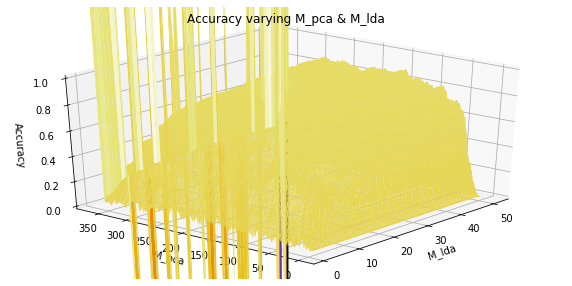

In [92]:

from mpl_toolkits import mplot3d

x = np.linspace(1, M_lda_range, M_lda_range)
y = np.linspace(1, M_pca_range, M_pca_range)

X, Y = np.meshgrid(x, y)

print(acc_array.shape)
print(X.shape)
print(Y.shape)
print(acc_array.min())
fig = plt.figure(figsize=[10,5])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, acc_array, rstride=1, cstride=1,
                cmap=plt.cm.CMRmap, edgecolor='none')
ax.set_title('Accuracy varying M_pca & M_lda');
ax.set_xlabel('M_lda')
ax.set_ylabel('M_pca')
ax.set_zlim3d(0,1)
ax.set_zlabel('Accuracy');

ax.view_init(30, 220)